In [1]:
# Team: Data Witches

#Calculate y (Ruikun)
#Control variables x1, x2, x3 (Elizabeth/Qnaire)
#Socio-econ (Xinhe)

### data exploration and visualization
# summary statistics [x historam (Eliza), x violin (Eliza), y histogram (Ruikun)]
# mulrivariate analysis (cross-tabulation)// comparative  [heatmap (Xinhe); pairplot (Xinhe)]

# Methods:
# LDA/QDA (+ CV, visualization) [Ruikun]
# KNN (+ CV, visualization) [Ruikun]
# Logistic R w/ RL (+ CV, visualization) [Eliza]
# SVM (+ CV, visualization) [Eliza]
# RF/Tree (+ CV, visualization) [Xinhe]
# spline/GAM (+ CV, visualization) [Xinhe]

## Categories of x:

# socio-economic factors: 
# 'gender', 'age', 'income_poverty_level',
# 'income_poverty_category', 'type_of_work', 'hours_worked',
# 'overall_work_schedule', 'main_reason_did_not_work_last_week', 

# health factors: 
# 'mbi', 'high_blood_pressure', 'high_Cholestrol', 'pain_in_chest', 'HIV',
# 'diabetes', 'hepatitis', 'health_condition', 'anemia', 'overweight', 'cancer'

# behavorial factors: 
# 'sleep_disorder_4hr14hr', 'smoking_cigarette',
# 'drink_frequency', 'vaccination', 'physical_activity', 'hh_food_security', 
# 'health_insurance', 'healthcare_received'

# Reference:
# https://med.stanford.edu/fastlab/research/imapp/msrs/_jcr_content/main/accordion/accordion_content3/download_256324296/file.res/PHQ9%20id%20date%2008.03.pdf
# https://www.hiv.uw.edu/page/mental-health-screening/phq-9


In [2]:
import pandas as pd
import functools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import sklearn.neighbors
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
# from sklearn.ensemble import VotingClassifier
# !pip install lazypredict
# from lightgbm import LGBMClassifier
# import lazypredict
# from lazypredict.Supervised import LazyClassifier
from IPython.display import clear_output
import plotly.express as px
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

## Data Cleaning and Manipulation

In [3]:
import pandas as pd
import functools
import numpy as np

#### Demographic ####
# demographic
demographic = pd.read_sas('P_DEMO.XPT')

# income
income = pd.read_sas('P_INQ.XPT')

# Occupation
occupation = pd.read_sas('P_OCQ.XPT')


##### health ######
# blood pressure
blood_pressure = pd.read_sas('P_BPXO.XPT')

# diabetes
diabetes = pd.read_sas('P_DIQ.XPT')

# blood pressure & Cholesterol (Questionnaire Data)
blood_pressure_chole = pd.read_sas('P_BPQ.XPT')

# Cardiovascular Health
cardio_health = pd.read_sas('P_CDQ.XPT')

# Hepatitis
hepatitis = pd.read_sas('P_HEQ.XPT')

# Current Health Status (HIV)
current_health = pd.read_sas('P_HSQ.XPT')

#mbi #body mearsure examination data
body = pd.read_sas('P_BMX.XPT')


###### Behaviors ######

# Health Insurance
insurance = pd.read_sas('P_HIQ.XPT')

#Hospital Utilization & Access to Care
hospital_access = pd.read_sas('P_HUQ.XPT')

# Immunization
immunization = pd.read_sas('P_IMQ.XPT')

# Medical Conditions (asthma, overweight, menstruation..)
med_conditions = pd.read_sas('P_MCQ.XPT')

# Physical Activity
physical_activity = pd.read_sas('P_PAQ.XPT')

# sleep disorder
sleep_disorder = pd.read_sas('P_SLQ.XPT')

# cigarette use
cigarette_use = pd.read_sas('P_SMQ.XPT')

# alcohol use
alcohol_use = pd.read_sas('P_ALQ.XPT')

# Diet Behavior & Nutrition
diet = pd.read_sas('P_DBQ.XPT')

# food security
food_security = pd.read_sas('P_FSQ.XPT')


# read_flies = ['P_BPXO.XPT', 'P_SLQ.XPT','P_SMQ.XPT','P_ALQ.XPT' ]
# dfs = [pd.read_csv(file) for file in read_flies]
# dfs

######## y ########
# Mental Health - Depression Screener
mental_health_depression = pd.read_sas('P_DPQ.XPT')

dfs = [demographic, income, occupation, body,blood_pressure, cigarette_use, diabetes, blood_pressure_chole, alcohol_use, cardio_health, 
hepatitis, current_health, insurance, hospital_access, immunization, med_conditions, physical_activity, 
sleep_disorder, cigarette_use, alcohol_use, diet, food_security]
df_Qnaire = functools.reduce(lambda left, right: pd.merge(left,right,on='SEQN'), dfs)
df_Qnaire

SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0     109271.0      66.0       2.0       1.0      49.0       NaN       3.0   
1     109274.0      66.0       2.0       1.0      68.0       NaN       5.0   
2     109282.0      66.0       2.0       1.0      76.0       NaN       3.0   
3     109284.0      66.0       2.0       2.0      44.0       NaN       1.0   
4     109290.0      66.0       2.0       2.0      68.0       NaN       4.0   
...        ...       ...       ...       ...       ...       ...       ...   
5944  124815.0      66.0       2.0       1.0      52.0       NaN       4.0   
5945  124817.0      66.0       2.0       2.0      67.0       NaN       1.0   
5946  124818.0      66.0       2.0       1.0      40.0       NaN       4.0   
5947  124821.0      66.0       2.0       1.0      63.0       NaN       4.0   
5948  124822.0      66.0       2.0       1.0      74.0       NaN       2.0   

      RIDRETH3  RIDEXMON  DMDBORN4  ...  FSD660ZC  FSD675  FSD680  FSD670ZC  \
0          3.0       2.0       1.0  ...       NaN     NaN     NaN       NaN   
1          7.0       1.0       1.0  ...       NaN     NaN     NaN       NaN   
2          3.0       2.0       1.0  ...       NaN     NaN     NaN       NaN   
3          1.0       1.0       2.0  ...       NaN     NaN     NaN       NaN   
4          4.0       2.0       1.0  ...       NaN     NaN     NaN       NaN   
...        ...       ...       ...  ...       ...     ...     ...       ...   
5944       4.0       2.0       1.0  ...       NaN     NaN     NaN       NaN   
5945       1.0       1.0       2.0  ...       NaN     NaN     NaN       NaN   
5946       4.0       1.0       1.0  ...       NaN     NaN     NaN       NaN   
5947       4.0       1.0       1.0  ...       NaN     NaN     NaN       NaN   
5948       2.0       2.0       2.0  ...       NaN     NaN     NaN       NaN   

      FSQ690  FSQ695  FSD652ZW  FSD672ZW  FSD652CW  FSD660ZW  
0        NaN     NaN       NaN       NaN       NaN       NaN  
1        NaN     NaN       NaN       NaN       NaN       NaN  
2        NaN     NaN       NaN       NaN       NaN       NaN  
3        NaN     NaN       NaN       NaN       NaN       NaN  
4        NaN     NaN       NaN       NaN       NaN       NaN  
...      ...     ...       ...       ...       ...       ...  
5944     NaN     NaN       NaN       NaN       NaN       NaN  
5945     NaN     NaN       NaN       NaN       NaN       NaN  
5946     NaN     NaN       NaN       NaN       NaN       NaN  
5947     NaN     NaN       NaN       NaN       NaN       NaN  
5948     NaN     NaN       NaN       NaN       NaN       NaN  

[5949 rows x 355 columns]

In [4]:
df_Qnaire = df_Qnaire.rename(columns={
    'SEQN':'SEQN',
    'RIAGENDR': 'gender',
    'RIDAGEYR': 'age',
    'INDFMMPI': 'income_poverty_level',
    'INDFMMPC': 'income_poverty_category',
    'OCD150':  'type_of_work',
    'OCQ180': 'hours_worked',
    'OCQ670': 'overall_work_schedule',
    'OCD383': 'main_reason_did_not_work_last_week',
    'BMXBMI': 'mbi',
    'BPQ020': 'high_blood_pressure',
    'BPQ080': 'high_Cholestrol', 
    'CDQ001': 'pain_in_chest',
    'HSQ590': 'HIV',
    'DIQ010': 'diabetes',
    'DBQ010': 'breastmilk',
    'FSDHH': 'hh_food_security',
    'HIQ011': 'health_insurance',
    'HEQ010': 'hepatitis',
    'HUQ010': 'health_condition',
    'HUQ051': 'healthcare_received',
    'IMQ011': 'hepatitisA_vaccine', #'1' to be merged - vaccine received
    'IMQ020': 'hepatitisB_vaccine',  #'1' to be merged - vaccine received
    'IMQ060': 'HPV_received_F', #'1' to be merged - vaccine received
    'IMQ070': 'HPV_received_M', #'1' to be merged - vaccine received
    'IMQ081A': 'Cervarix_F', #'1' to be merged - vaccine received
    'IMQ081B': 'Gardasil_F', #'1' to be merged - vaccine received
    'MCQ035': 'asthma',
    'MCQ053': 'anemia',
    'MCQ080': 'overweight',
    'MCQ170M': 'thyroid',
    'MCQ170L': 'liver_condition',
    'MCQ220': 'cancer',
    'PAQ605': 'vigoros_work_acitivity',
    'PAQ635': 'walk_bike',
    'SLD012': 'sleep_disorder_4hr14hr',
    'SMQ020_x': 'smoking_cigarette', # 100more in life #SMQ040 'SMQ040_x'
    'ALQ121_x': 'drink_frequency' 



})



In [5]:
df_Qnaire = df_Qnaire[['SEQN',
    'gender',
    'age',
    'income_poverty_level',
    'income_poverty_category',
    'type_of_work',
    'hours_worked',
    'overall_work_schedule',
    'main_reason_did_not_work_last_week',  
    'mbi',
    'high_blood_pressure',
    'high_Cholestrol', 
    'pain_in_chest', 
     'HIV',
    'diabetes',
    # 'breastmilk', # removed due to 0 non-null
    'hh_food_security',
   'health_insurance',
     'hepatitis',
     'health_condition',
    'healthcare_received',
    'hepatitisA_vaccine', #'1' to be merged - vaccine received
    'hepatitisB_vaccine',  #'1' to be merged - vaccine received
    # 'HPV_received_F', #'1' to be merged - vaccine received # removed low non-null
    # 'HPV_received_M', #'1' to be merged - vaccine received # removed low non-null
    #  'Cervarix_F', #'1' to be merged - vaccine received # removed 32 non-null
    #  'Gardasil_F', #'1' to be merged - vaccine received # rmeoved 11 non-null
    # 'asthma', # removed low non-null
     'anemia',
    'overweight',
    # 'thyroid', # removed low non-null
    # 'liver_condition', # removed low non-null
    'cancer',
     'vigoros_work_acitivity',
    'walk_bike',
     'sleep_disorder_4hr14hr',
     'smoking_cigarette',
    'drink_frequency']]

df_Qnaire.info(max_cols=100000)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5949 entries, 0 to 5948
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SEQN                                5949 non-null   float64
 1   gender                              5949 non-null   float64
 2   age                                 5949 non-null   float64
 3   income_poverty_level                4697 non-null   float64
 4   income_poverty_category             5462 non-null   float64
 5   type_of_work                        5949 non-null   float64
 6   hours_worked                        2756 non-null   float64
 7   overall_work_schedule               2874 non-null   float64
 8   main_reason_did_not_work_last_week  2939 non-null   float64
 9   mbi                                 5811 non-null   float64
 10  high_blood_pressure                 5949 non-null   float64
 11  high_Cholestrol                     5949 no

In [6]:
# fill in missing value first - proportionally according to non-nan values
list = ['income_poverty_level','income_poverty_category','hours_worked',
        'overall_work_schedule','main_reason_did_not_work_last_week','mbi',
        'HIV', 'hh_food_security', 'sleep_disorder_4hr14hr','drink_frequency']
for i in list:
    # Calculate the distribution of non-NaN values
    distribution = df_Qnaire[i].value_counts(normalize=True)

    # Get the NaN indices in the column
    nan_indices = df_Qnaire[df_Qnaire[i].isnull()].index

    # Randomly select values according to the distribution to fill NaNs
    random_choices = np.random.choice(distribution.index, size=len(nan_indices), p=distribution.values)

    # Fill in the NaN values in the DataFrame
    df_Qnaire.loc[nan_indices, i] = random_choices
# source: ChatGTP

df_Qnaire.info(max_cols=100000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5949 entries, 0 to 5948
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SEQN                                5949 non-null   float64
 1   gender                              5949 non-null   float64
 2   age                                 5949 non-null   float64
 3   income_poverty_level                5949 non-null   float64
 4   income_poverty_category             5949 non-null   float64
 5   type_of_work                        5949 non-null   float64
 6   hours_worked                        5949 non-null   float64
 7   overall_work_schedule               5949 non-null   float64
 8   main_reason_did_not_work_last_week  5949 non-null   float64
 9   mbi                                 5949 non-null   float64
 10  high_blood_pressure                 5949 non-null   float64
 11  high_Cholestrol                     5949 no

In [7]:
# data manipulation
# merge two hepatitis vaccination
df_Qnaire['hepatitisA_vaccine'] = np.where(df_Qnaire['hepatitisA_vaccine'] <3, 1, 0)
df_Qnaire['hepatitisB_vaccine'] = np.where(df_Qnaire['hepatitisB_vaccine'] <3, 1, 0)
df_Qnaire['vaccination'] = 0
df_Qnaire['vaccination'] = np.where(df_Qnaire['hepatitisA_vaccine'] == 1, 1, df_Qnaire['vaccination'])
df_Qnaire['vaccination'] = np.where(df_Qnaire['hepatitisB_vaccine'] == 1, 1, df_Qnaire['vaccination'])
df_Qnaire = df_Qnaire.drop(columns=['hepatitisA_vaccine', 'hepatitisB_vaccine'])

# combine vigoros and mild physical activities
df_Qnaire['vigoros_work_acitivity'] = np.where(df_Qnaire['vigoros_work_acitivity'] ==1, 1, 0)
df_Qnaire['walk_bike'] = np.where(df_Qnaire['walk_bike'] ==1, 1, 0)
df_Qnaire['physical_activity'] = 0
df_Qnaire['physical_activity'] = np.where(df_Qnaire['vigoros_work_acitivity'] == 1, 1, df_Qnaire['physical_activity'])
df_Qnaire['physical_activity'] = np.where(df_Qnaire['walk_bike'] == 1, 1, df_Qnaire['physical_activity'])
df_Qnaire = df_Qnaire.drop(columns=['vigoros_work_acitivity', 'walk_bike'])

# turn into binery
list = ['high_blood_pressure', 'high_Cholestrol', 'pain_in_chest', 'HIV', 'diabetes', 
         'health_insurance', 'hepatitis', 'anemia','overweight', 'cancer','vaccination','physical_activity', 'smoking_cigarette']
for i in list:
    df_Qnaire[i] = np.where(df_Qnaire[i] ==1, 1, 0)

# sleep disorder (more than 14 hours or less than 4 hours)
df_Qnaire['sleep_disorder_4hr14hr'] = np.where((df_Qnaire['sleep_disorder_4hr14hr'] ==2)|(df_Qnaire['sleep_disorder_4hr14hr'] ==14), 1, 0)

In [8]:
df_Qnaire.info(max_cols=100000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5949 entries, 0 to 5948
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SEQN                                5949 non-null   float64
 1   gender                              5949 non-null   float64
 2   age                                 5949 non-null   float64
 3   income_poverty_level                5949 non-null   float64
 4   income_poverty_category             5949 non-null   float64
 5   type_of_work                        5949 non-null   float64
 6   hours_worked                        5949 non-null   float64
 7   overall_work_schedule               5949 non-null   float64
 8   main_reason_did_not_work_last_week  5949 non-null   float64
 9   mbi                                 5949 non-null   float64
 10  high_blood_pressure                 5949 non-null   int64  
 11  high_Cholestrol                     5949 no

In [9]:
df_Qnaire.describe()

SEQN       gender          age  income_poverty_level  \
count    5949.000000  5949.000000  5949.000000          5.949000e+03   
mean   117056.792234     1.505967    60.313162          2.464444e+00   
std      4470.446103     0.500006    11.910699          1.547618e+00   
min    109271.000000     1.000000    40.000000          5.397605e-79   
25%    113194.000000     1.000000    50.000000          1.150000e+00   
50%    117019.000000     2.000000    60.000000          2.050000e+00   
75%    120905.000000     2.000000    70.000000          3.690000e+00   
max    124822.000000     2.000000    80.000000          5.000000e+00   

       income_poverty_category  type_of_work  hours_worked  \
count              5949.000000   5949.000000   5949.000000   
mean                  2.486636      2.550177    140.677929   
std                   1.488026      1.476461   3173.202923   
min                   1.000000      1.000000      5.000000   
25%                   1.000000      1.000000     35.000000   
50%                   3.000000      3.000000     40.000000   
75%                   3.000000      4.000000     48.000000   
max                   9.000000      9.000000  99999.000000   

       overall_work_schedule  main_reason_did_not_work_last_week          mbi  \
count            5949.000000                         5949.000000  5949.000000   
mean                2.816944                            3.540595    30.260128   
std                 1.740265                            4.139779     7.256933   
min                 1.000000                            1.000000    14.200000   
25%                 1.000000                            3.000000    25.400000   
50%                 3.000000                            3.000000    29.000000   
75%                 5.000000                            4.000000    33.800000   
max                 7.000000                           99.000000    84.400000   

       ...  health_condition  healthcare_received       anemia   overweight  \
count  ...       5949.000000         5.949000e+03  5949.000000  5949.000000   
mean   ...          2.911582         2.892587e+00     0.056480     0.416541   
std    ...          1.037259         4.927251e+00     0.230866     0.493027   
min    ...          1.000000         5.397605e-79     0.000000     0.000000   
25%    ...          2.000000         1.000000e+00     0.000000     0.000000   
50%    ...          3.000000         2.000000e+00     0.000000     0.000000   
75%    ...          4.000000         3.000000e+00     0.000000     1.000000   
max    ...          9.000000         9.900000e+01     1.000000     1.000000   

            cancer  sleep_disorder_4hr14hr  smoking_cigarette  \
count  5949.000000             5949.000000        5949.000000   
mean      0.142545                0.008237           0.450160   
std       0.349638                0.090389           0.497552   
min       0.000000                0.000000           0.000000   
25%       0.000000                0.000000           0.000000   
50%       0.000000                0.000000           0.000000   
75%       0.000000                0.000000           1.000000   
max       1.000000                1.000000           1.000000   

       drink_frequency  vaccination  physical_activity  
count     5.949000e+03  5949.000000        5949.000000  
mean      4.472348e+00     0.295848           0.363927  
std       4.218612e+00     0.456461           0.481168  
min       5.397605e-79     0.000000           0.000000  
25%       5.397605e-79     0.000000           0.000000  
50%       5.000000e+00     0.000000           0.000000  
75%       8.000000e+00     1.000000           1.000000  
max       9.900000e+01     1.000000           1.000000  

[8 rows x 28 columns]

It is observed there are outliers for the variable 'hours_worked' as 99999. We need to replace this value before further analysis.

In [10]:
df_Qnaire[df_Qnaire['hours_worked'] >90000]['hours_worked'] # find outliers

244     99999.0
518     99999.0
3281    99999.0
3613    99999.0
3910    99999.0
5536    99999.0
Name: hours_worked, dtype: float64

In [11]:
df_Qnaire[df_Qnaire['hours_worked'] <90000]['hours_worked'].describe() # find the second largest

count    5943.000000
mean       39.861854
std        14.155146
min         5.000000
25%        35.000000
50%        40.000000
75%        48.000000
max        80.000000
Name: hours_worked, dtype: float64

In [12]:
df_Qnaire.loc[df_Qnaire['hours_worked'] > 90000, 'hours_worked'] = 80

In [13]:
# respones variable
data = pd.read_sas('P_DPQ.XPT')
data = data.drop(columns = 'DPQ100')
data = data.dropna(subset=['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 
                           'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090'])
data = data[~data.loc[:, 'DPQ010':'DPQ090'].isin([7, 9]).any(axis=1)]


datashape = data.shape
datashape

(8276, 10)

In [14]:
# Replace all values smaller than 0.5 with 0 in the dataset, excluding the SEQN column
datacopy = data.copy()

for column in datacopy.columns[1:]:  # Skip SEQN column
    datacopy[column] = datacopy[column].apply(lambda x: 0 if x < 0.5 else x)

datacopy.head()

SEQN  DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  \
0  109266.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1  109271.0     2.0     1.0     0.0     0.0     0.0     0.0     2.0     0.0   
2  109273.0     2.0     2.0     2.0     2.0     2.0     2.0     2.0     1.0   
3  109274.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4  109282.0     0.0     1.0     0.0     1.0     0.0     0.0     0.0     3.0   

   DPQ090  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [15]:
# SEQN should be an integer
datacopy['SEQN'] = datacopy['SEQN'].astype(int)

In [16]:
unique_values_counts = {}

# Iterate over each DPQ column to count the unique values
for column in datacopy.columns[1:]:  # Skip SEQN column
    unique_values_counts[column] = datacopy[column].value_counts().to_dict()

unique_values_counts


{'DPQ010': {0.0: 6154, 1.0: 1368, 2.0: 447, 3.0: 307},
 'DPQ020': {0.0: 6171, 1.0: 1454, 2.0: 386, 3.0: 265},
 'DPQ030': {0.0: 5013, 1.0: 1884, 3.0: 762, 2.0: 617},
 'DPQ040': {0.0: 4154, 1.0: 2676, 2.0: 750, 3.0: 696},
 'DPQ050': {0.0: 6149, 1.0: 1291, 2.0: 461, 3.0: 375},
 'DPQ060': {0.0: 6864, 1.0: 968, 2.0: 239, 3.0: 205},
 'DPQ070': {0.0: 6846, 1.0: 891, 3.0: 288, 2.0: 251},
 'DPQ080': {0.0: 7406, 1.0: 528, 2.0: 196, 3.0: 146},
 'DPQ090': {0.0: 7957, 1.0: 233, 2.0: 51, 3.0: 35}}

In [17]:
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8276 entries, 0 to 8964
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    8276 non-null   int64  
 1   DPQ010  8276 non-null   float64
 2   DPQ020  8276 non-null   float64
 3   DPQ030  8276 non-null   float64
 4   DPQ040  8276 non-null   float64
 5   DPQ050  8276 non-null   float64
 6   DPQ060  8276 non-null   float64
 7   DPQ070  8276 non-null   float64
 8   DPQ080  8276 non-null   float64
 9   DPQ090  8276 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 711.2 KB


In [18]:
# Sum the scores from DPQ010 to DPQ090 for each respondent to create a depression severity score
datacopy['Depression_Severity_Score'] = datacopy.loc[:, 'DPQ010':'DPQ090'].sum(axis=1)

# Display the first few rows to verify the new column
datacopy[['SEQN', 'Depression_Severity_Score']].head()


SEQN  Depression_Severity_Score
0  109266                        0.0
1  109271                        5.0
2  109273                       15.0
3  109274                        0.0
4  109282                        5.0

In [19]:
def categorize_severity(score):
    if 1 <= score <= 4:
        return "Minimal depression"
    elif 5 <= score <= 9:
        return "Mild depression"
    elif 10 <= score <= 14:
        return "Moderate depression"
    elif 15 <= score <= 19:
        return "Moderately severe depression"
    elif 20 <= score <= 27:
        return "Severe depression"
    else:
        return "No depression"  # Assuming that a score of 0 indicates no depression

# Apply the function to the 'Depression_Severity_Score' to create the new 'Depression_Severity' column
datacopy['Depression_Severity'] = datacopy['Depression_Severity_Score'].apply(categorize_severity)

# Show the first few rows to verify the new column
datacopy[['SEQN', 'Depression_Severity_Score', 'Depression_Severity']].head()


SEQN  Depression_Severity_Score           Depression_Severity
0  109266                        0.0                 No depression
1  109271                        5.0               Mild depression
2  109273                       15.0  Moderately severe depression
3  109274                        0.0                 No depression
4  109282                        5.0               Mild depression

In [20]:
datacopy['Depression_Severity'].value_counts()

Depression_Severity
Minimal depression              3355
No depression                   2754
Mild depression                 1400
Moderate depression              502
Moderately severe depression     190
Severe depression                 75
Name: count, dtype: int64

In [21]:
# Create a new column 'If_Depression' where the value is 0 if 'Depression_Severity' is "No depression", else 1
datacopy['If_Depression'] = datacopy['Depression_Severity'].apply(lambda x: 0 if x == "No depression" or x == "Minimal depression" else 1)

In [22]:
datacopy['If_Depression'].value_counts()

If_Depression
0    6109
1    2167
Name: count, dtype: int64

In [23]:
depression_var = datacopy[['SEQN', 'If_Depression', 'Depression_Severity', 'Depression_Severity_Score']]  


In [24]:
merged_df = df_Qnaire.merge(depression_var, on='SEQN', how='inner')

In [25]:
merged_df.info(max_cols = 100000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5482 entries, 0 to 5481
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SEQN                                5482 non-null   float64
 1   gender                              5482 non-null   float64
 2   age                                 5482 non-null   float64
 3   income_poverty_level                5482 non-null   float64
 4   income_poverty_category             5482 non-null   float64
 5   type_of_work                        5482 non-null   float64
 6   hours_worked                        5482 non-null   float64
 7   overall_work_schedule               5482 non-null   float64
 8   main_reason_did_not_work_last_week  5482 non-null   float64
 9   mbi                                 5482 non-null   float64
 10  high_blood_pressure                 5482 non-null   int64  
 11  high_Cholestrol                     5482 no

In [26]:
merged_df['If_Depression'].value_counts()

If_Depression
0    4045
1    1437
Name: count, dtype: int64

## Data Exploration

### Depression as the Response Variable

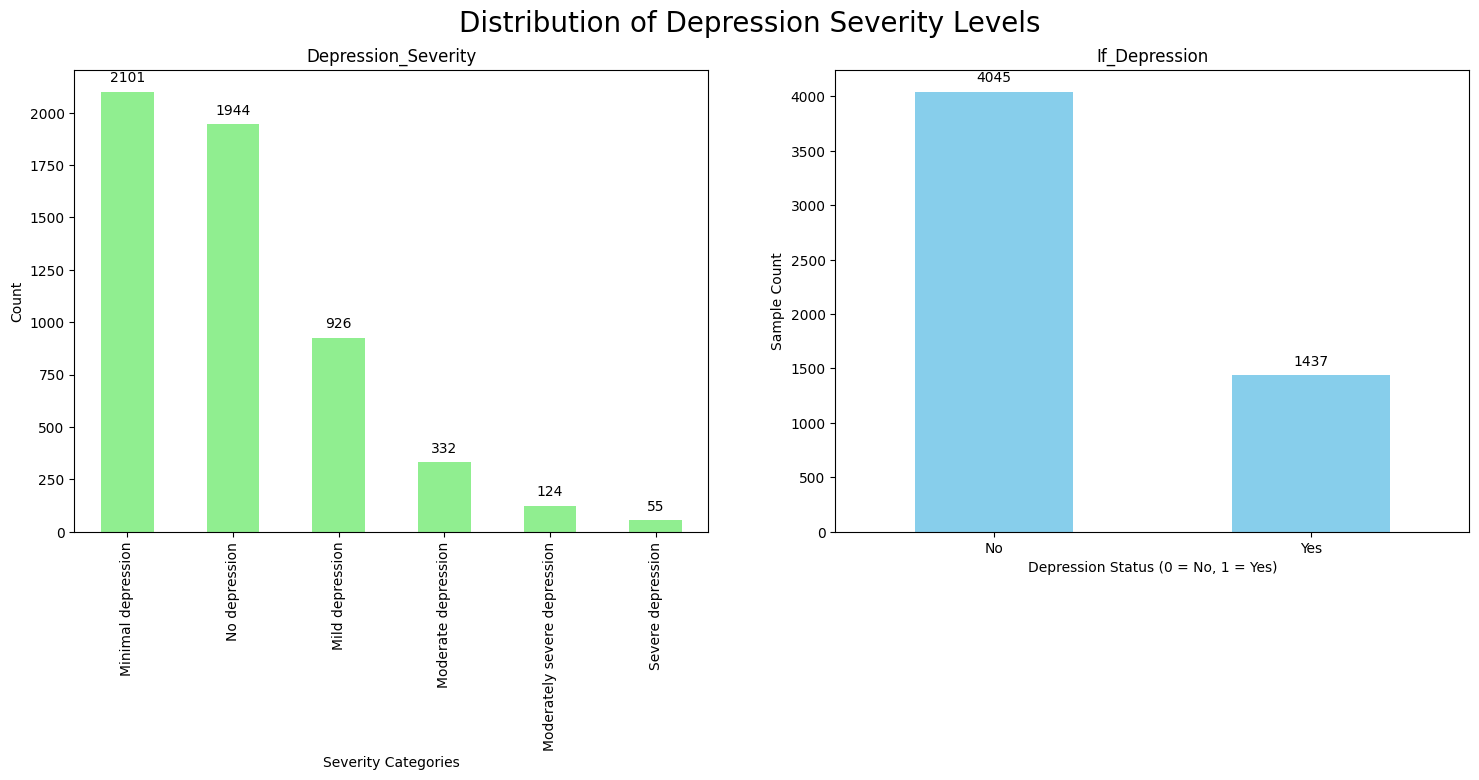

In [27]:
# response variable
depression_variables = ['']
n_cols = 2
n_rows = 1

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5,n_rows*5))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle('Distribution of Depression Severity Levels', fontsize=20)

#flatten axes
axes_flat = axes.flatten()

# histogram of Depression_Severity 

severity_counts = merged_df['Depression_Severity'].value_counts()
severity_plot = severity_counts.plot(kind='bar', ax=axes[0], color='lightgreen')
axes[0].set_title('Depression_Severity')
axes[0].set_xlabel('Severity Categories')
axes[0].set_ylabel('Count')

# Adding labels to each bar
for p in severity_plot.patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# histogram of If_Depression 

if_depression_counts = merged_df['If_Depression'].value_counts()
if_depression_plot = if_depression_counts.plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('If_Depression')
axes[1].set_xlabel('Depression Status (0 = No, 1 = Yes)')
axes[1].set_ylabel('Sample Count')
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)

# Adding labels to each bar
for p in if_depression_plot.patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

The original scores of depression diagnosis have been converted to both categorical ranking of 1 to 6 (larger number corresponding to a higher level of depression severity), and the binary variable in 1 and 0 ( 1 as diagnosed with depression, 0 as not). Among the 5,482 responders, 1,437 have been diagnosed with different levels of depression, and the rest 4045 are healthy in this respect. 

### Health Factors, and the Association with Depression Occurrence

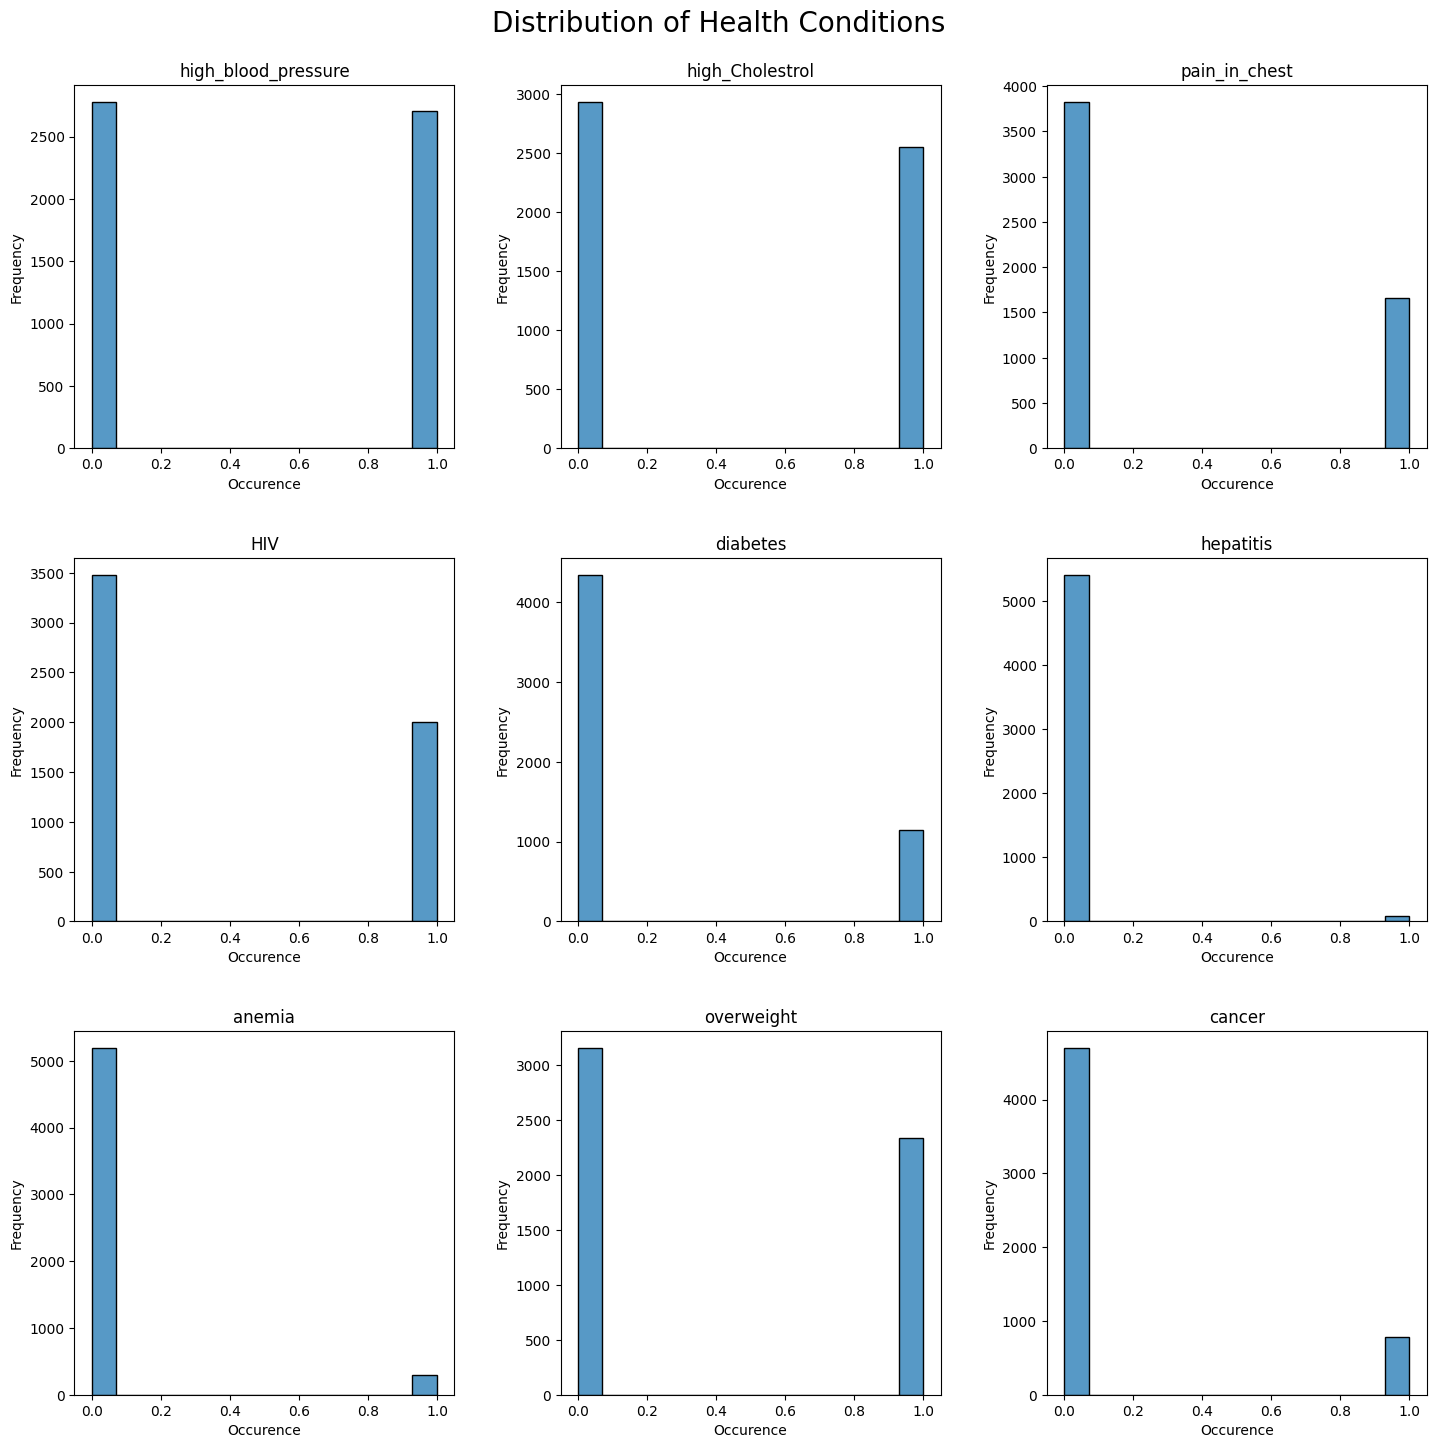

In [28]:
health = ['high_blood_pressure', 'high_Cholestrol', 'pain_in_chest', 'HIV', #'mbi', 
          'diabetes', 'hepatitis', 'anemia', 'overweight', 'cancer'] #'health_condition',
n_cols = 3
n_rows = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5,n_rows*5))
fig.suptitle('Distribution of Health Conditions', fontsize=20)

#flatten axes
axes_flat = axes.flatten()

# iterate over all columns
for ax, col in zip(axes_flat, health):
    sns.histplot(merged_df, x=col, kde=False, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Occurence')
    ax.set_ylabel('Frequency')

# adjust layout
plt.tight_layout()
plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.93)
plt.show()

The above charts illustrate the frequency of occurrence of health conditions. The selected variables are categorical, binary in particular. 

It is observed that the population with high blood pressure almost breaks even with the healthy population. This is followed by high cholesterol, where the occurrence rate is also close to half of the population. Around 1/3 of the population were diagnosed with HIV or have had pain in chest. Around 1/4 of the population has ever been diagnosed with diabetes. Only a tiny percentage of the population were diagnosed with hepatitis.

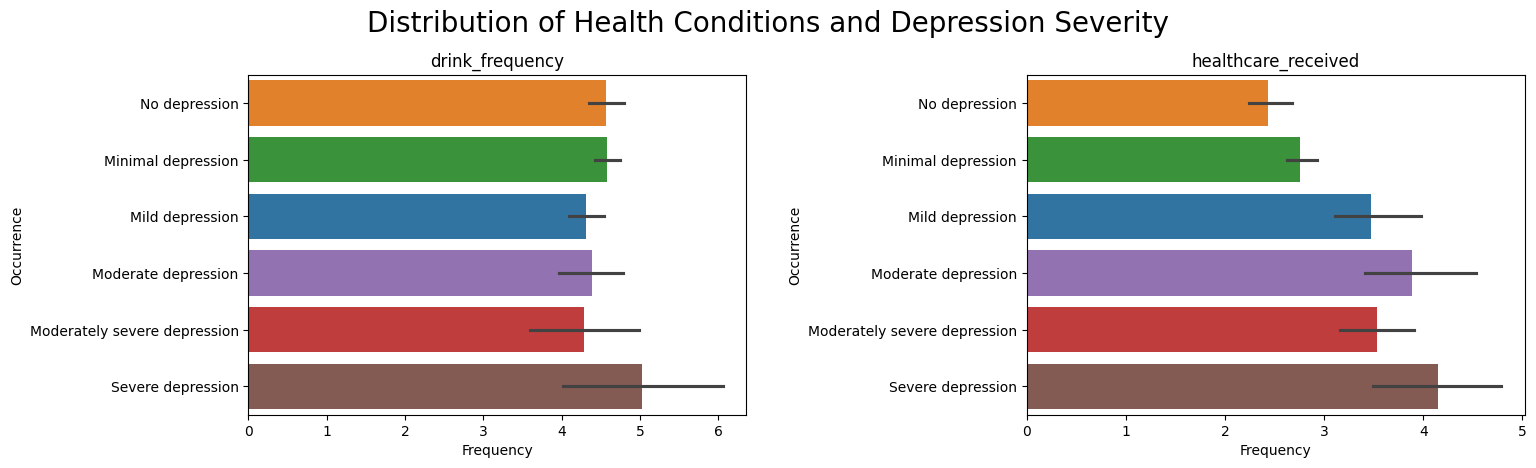

In [29]:
two_var = ['drink_frequency', 'healthcare_received']
n_cols = 2
n_rows = 1
d_order = ['No depression', 'Minimal depression', 'Mild depression', 'Moderate depression', 'Moderately severe depression', 'Severe depression']

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*8,n_rows*5))
fig.suptitle('Distribution of Health Conditions and Depression Severity', fontsize=20)

#flatten axes
axes_flat = axes.flatten()

# iterate over all columns
for ax, col in zip(axes_flat, two_var):
    # sns.histplot(merged_df, x=col, kde=False, hue = 'Depression_Severity', ax=ax)
    sns.barplot(data=merged_df, x=col, y='Depression_Severity', hue='Depression_Severity', order=d_order, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Occurrence')

# adjust layout
plt.tight_layout()
plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.85)
plt.show()

The above charts shows the aggregation of drink frequency against depression severity, and the number of healthcare received against depression severity.

- Drink frequency: it is observed that the group with severe depression has higher frequency in drinking, higher than five times per week. The healthy groups including no depression and minimal depression has slightly higher drinking frequency than the rest groups - all above four times a week.

- Healthcare received: it is observed that in general, the number of healthcare received goes up when the depression symptom gets more severe (except that moderate depression has the second frequent healthcare received, while it is ranked third in severity). 

### Health Related Behavior Factors and Depression Occurrence

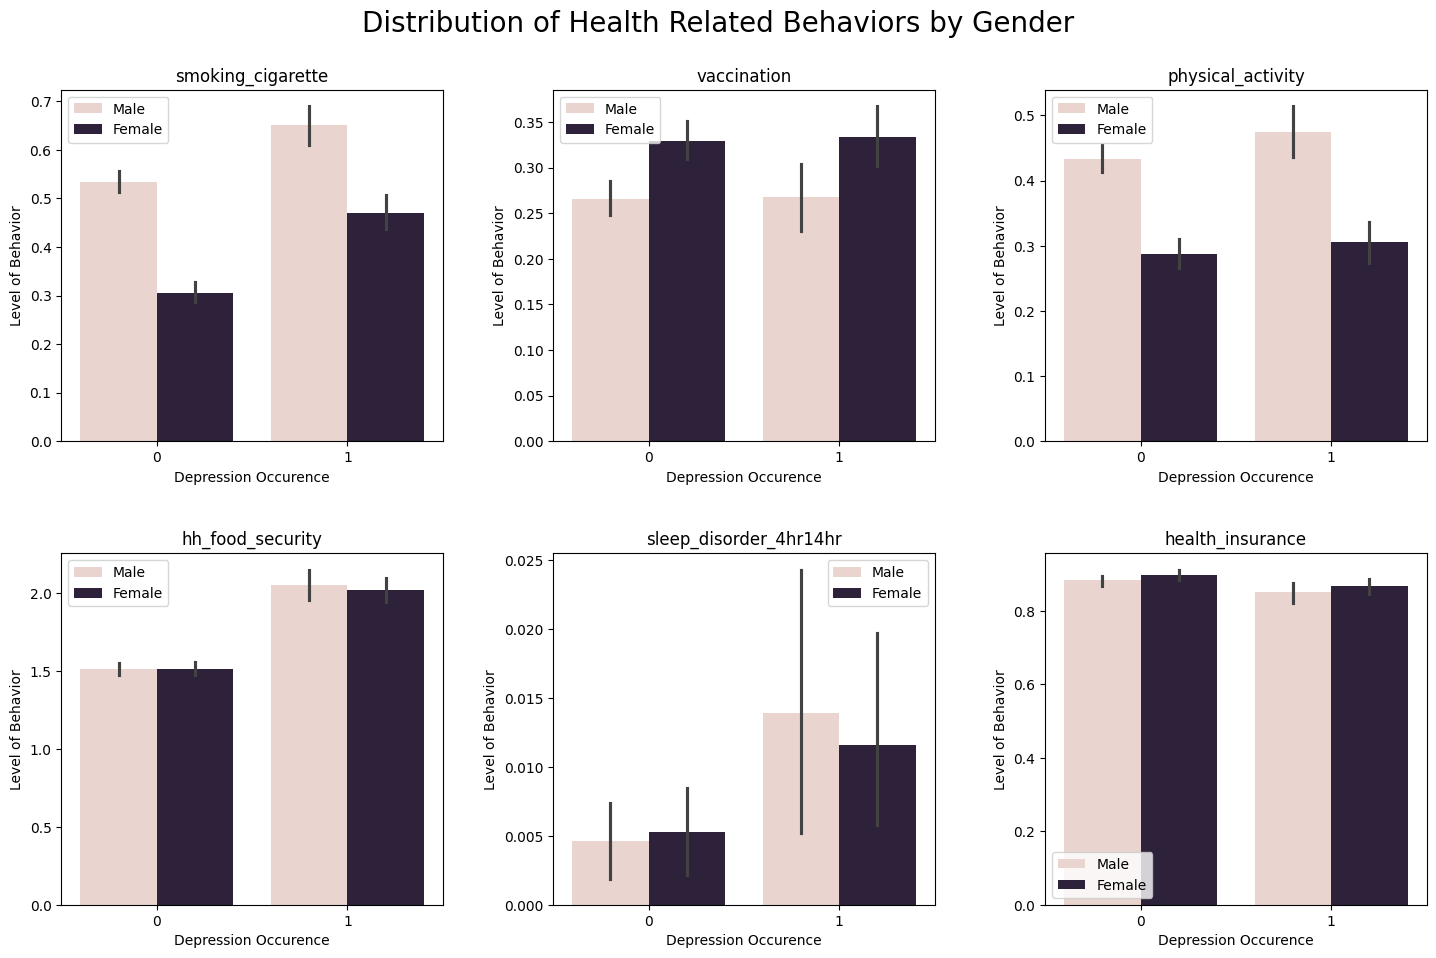

In [30]:
behavior = ['smoking_cigarette',
            'vaccination', 'physical_activity', 'hh_food_security', 
            'sleep_disorder_4hr14hr', 'health_insurance'] 

n_cols = 3
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5,n_rows*5))
fig.suptitle('Distribution of Health Related Behaviors by Gender', fontsize=20)

#flatten axes
axes_flat = axes.flatten()

# iterate over all columns
for ax, col in zip(axes_flat, behavior):
    sns.barplot(data=merged_df, x='If_Depression', y=col, hue = 'gender', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Depression Occurence')
    ax.set_ylabel('Level of Behavior')
    legend_handles, _= ax.get_legend_handles_labels()
    ax.legend(legend_handles, ['Male', 'Female'])

plt.tight_layout()
plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.9)
plt.show()

The above charts demonstrate the distribution of behavior factors against depression occurrence by gender.

- Smoking cigarettes: The frequency of smoking is in general higher in the group with depression. Males in general shows higher rate in smoking cigarettes than females. 

- Vaccination: The vaccination frequency breaks even between the two groups of having and not having depression. Females have a higher rate in receiving vaccination.

- Physical activities: Males in general involves more physical activities than females. It is observed that both male and female who have depression have done more physical activities than those don't have depression.

- Food security: The level of food security is lower with the group who have depression (higher score, lower food security). There is no obvious difference regarding food security between males and females.

- Sleeping disorder: Sleeping disorder includes those who sleep more than 14 hours and those who sleep less than 4 hours. There is a quite significant different of sleeping behaviors between the group who have depression and those who don't. Those who have depression show significantly higher frequency regarding sleeping behaviors. Among the derpession group, males have higher chance of sleeping disorder; the pattern is reverted in the other group but with less different between genders.

- Health insurance: In general, the group who have depression shows lower level in having health insurance. The difference is not quite large. Females show slightly higher level in having health insurance than males.

### Socio-economic Factors

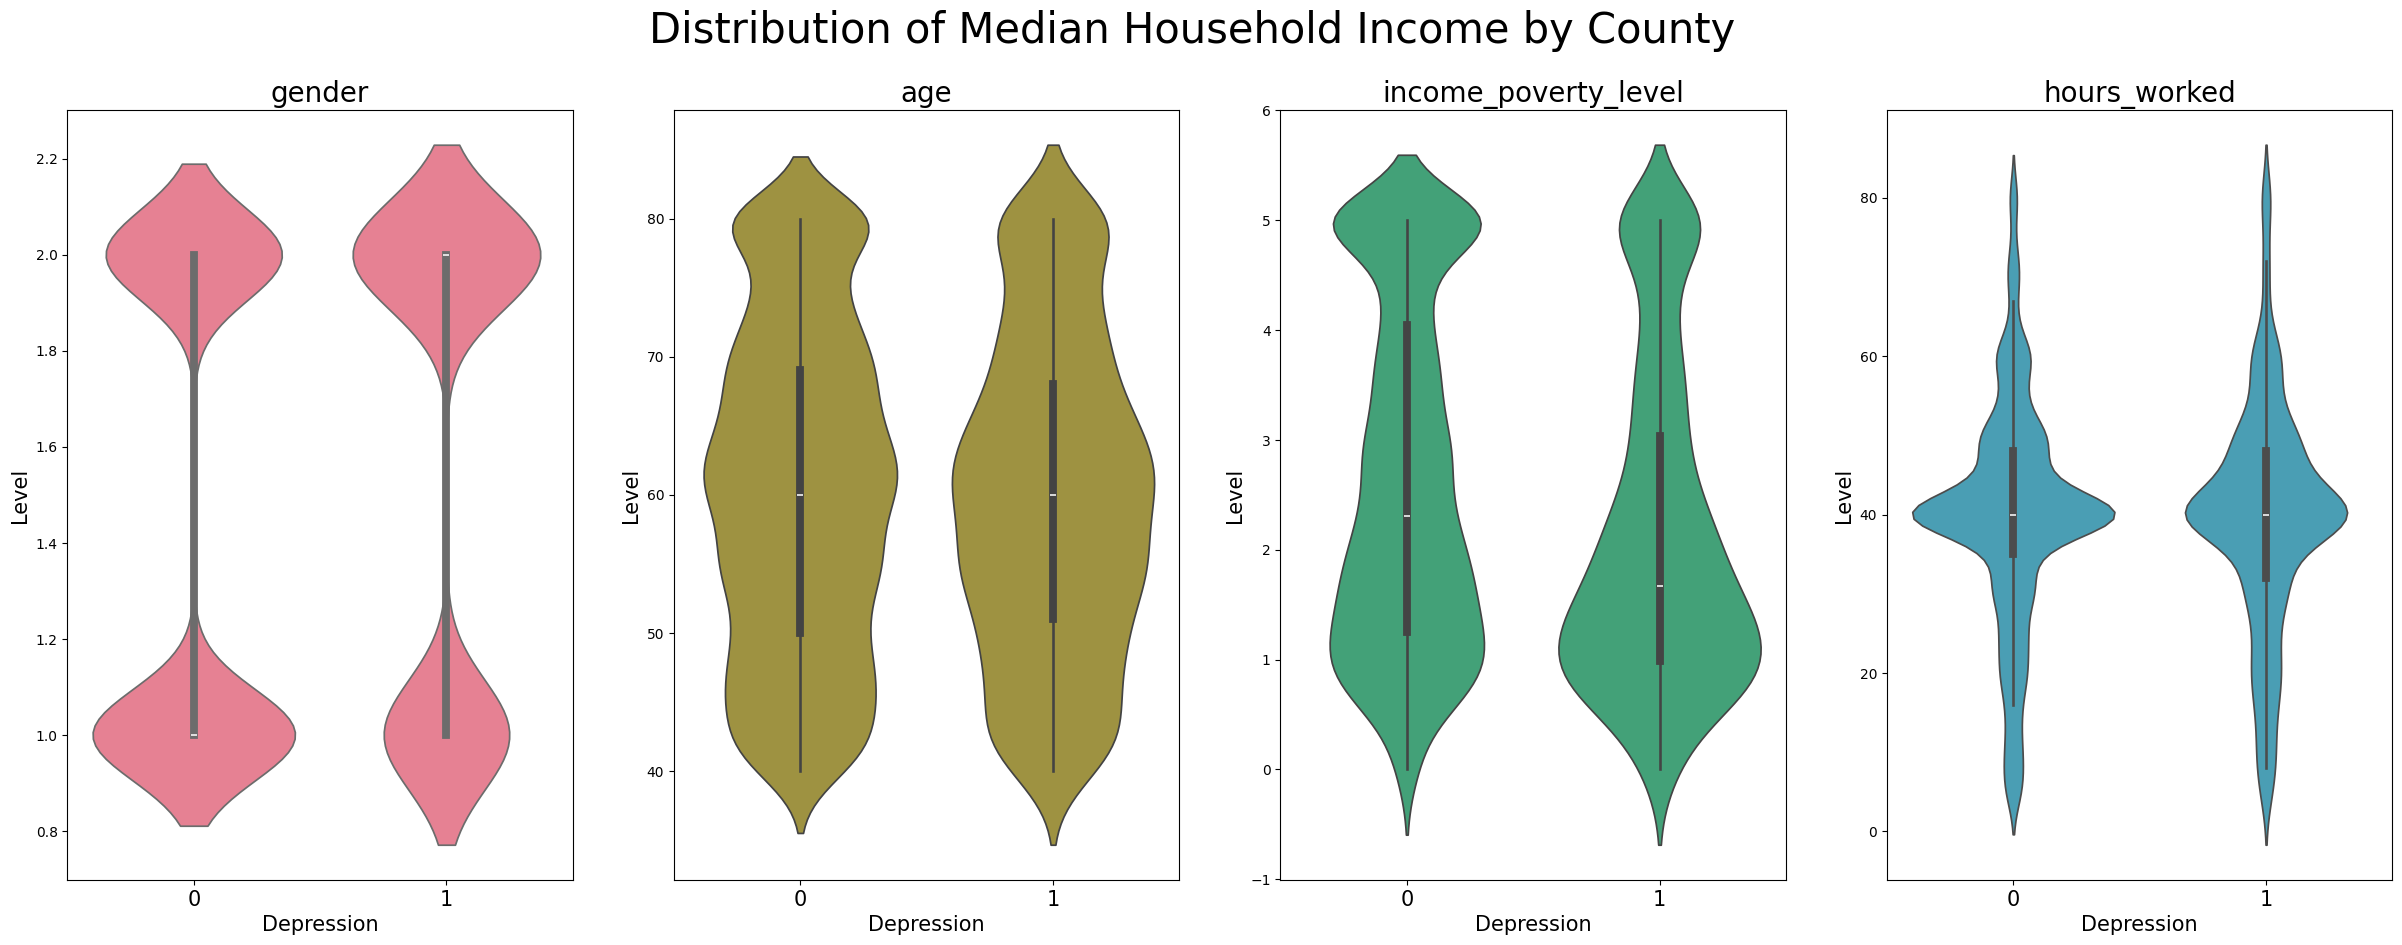

In [31]:
socioecon = ['gender', 'age', 'income_poverty_level', #'income_poverty_category', 
               'hours_worked' ] #'type_of_work','overall_work_schedule', 'main_reason_did_not_work_last_week'

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 10))
fig.suptitle('Distribution of Median Household Income by County', fontsize=30)
axes_flat = axes.flatten()

custom_palette = sns.color_palette("husl", 5)

for ax, i, j in zip(axes_flat, socioecon, range(0, 5)):
    # sns.violinplot(data=socioecon[socioecon['If_Depresion']==i],  x='Depression Occurrence', y=i, color= custom_palette[j], ax=ax)
    sns.violinplot(data=merged_df, x='If_Depression', y=i, color= custom_palette[j], ax=ax)
    ax.set_title(i, fontsize = 20)
    ax.set_ylabel('Level', fontsize = 15)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), fontsize = 15)
    ax.set_xlabel('Depression', fontsize = 15)

plt.show()


Socio-economic factors are illustrated against depression occurrence.

- Gender: In general, among those who have depression, there are more males than females (male as 1, female as 2).

- Age: The depression occurence group concentrated on ages of 40 above, with age range of around 55 and 60 as the largest group.

- Income-poverty-level: There is a contrast between the group with depression versus those who don't have depression. It is observed that people with lower income-poverty-level are more likely to be associated with depression.

- Hours worked: The majority regardless having depression or not work for regular hours of 40.

### Correlation among Variables

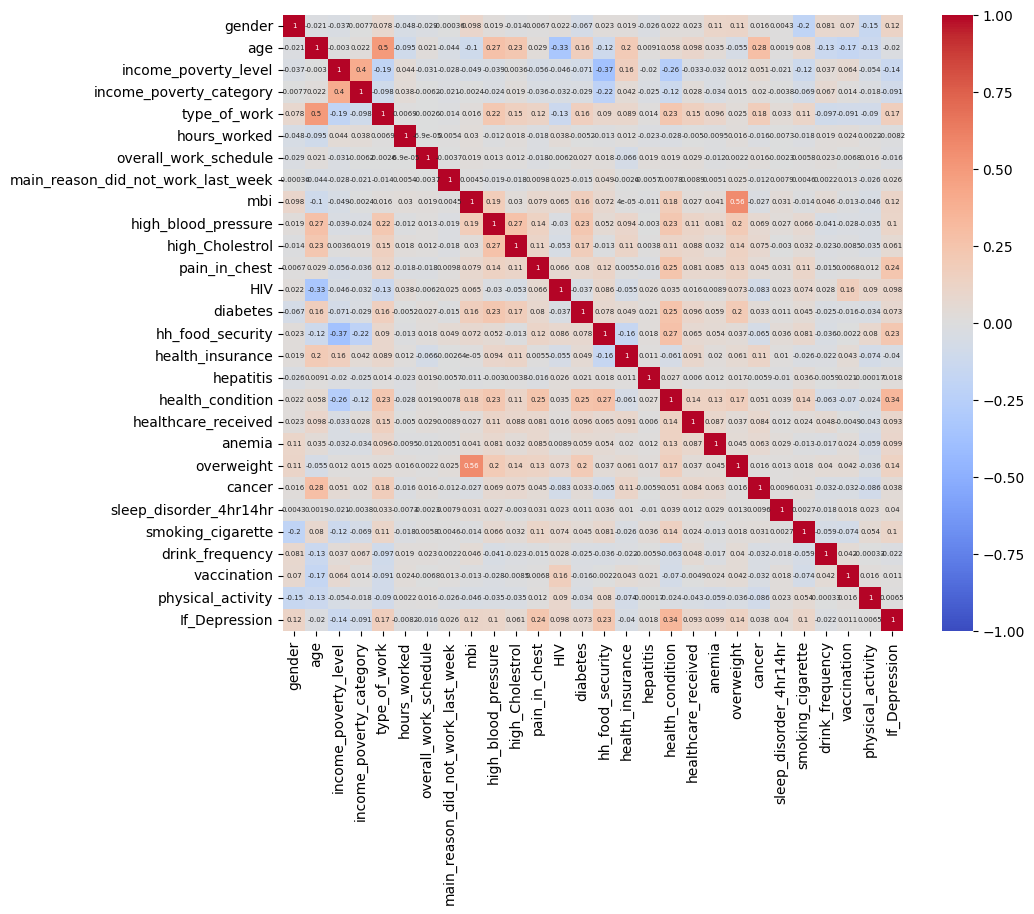

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = merged_df.drop(columns = ['Depression_Severity_Score', 'Depression_Severity', 'SEQN'])
# calculate correlation matrix
corr = df_corr.corr()

plt.figure(figsize=(10, 8))

# plot heatmap
sns.heatmap(corr, cmap='coolwarm', annot = True, vmax = 1, vmin = -1, annot_kws={"fontsize":5})
plt.show()

The heatmap visualizes the correlation between each pair of variables. Apart from some obvious correlation such as overweight and MBI index, It is observed that in general the linear correlation between variables is quite low. However, the weak linear correlation may not indicate how strong the features are associated in the non-linear models. Some salient association between features are described below:

- Age and type of work: Age and the type of work are positively correlated with correlation covariance of 0.5.


- Food security and income-poverty level: Food security and income-poverty-level show a negative correlation covariance of -0.36. Higher levels of poverty are associated with lower levels of food security (higher value).


- Health condition and income-poverty level: Health condition and income-poverty level show a negative correlation covariance of -0.26. Higher levels of poverty are associated with worse health conditions. 


- HIV and age: It seems HIV’s higher occurrence is associated with lower age groups with correlation covariance of -0.33.


- Health condition and depression occurrence: A better health condition (lower value) is associated with the possibility of having depression.


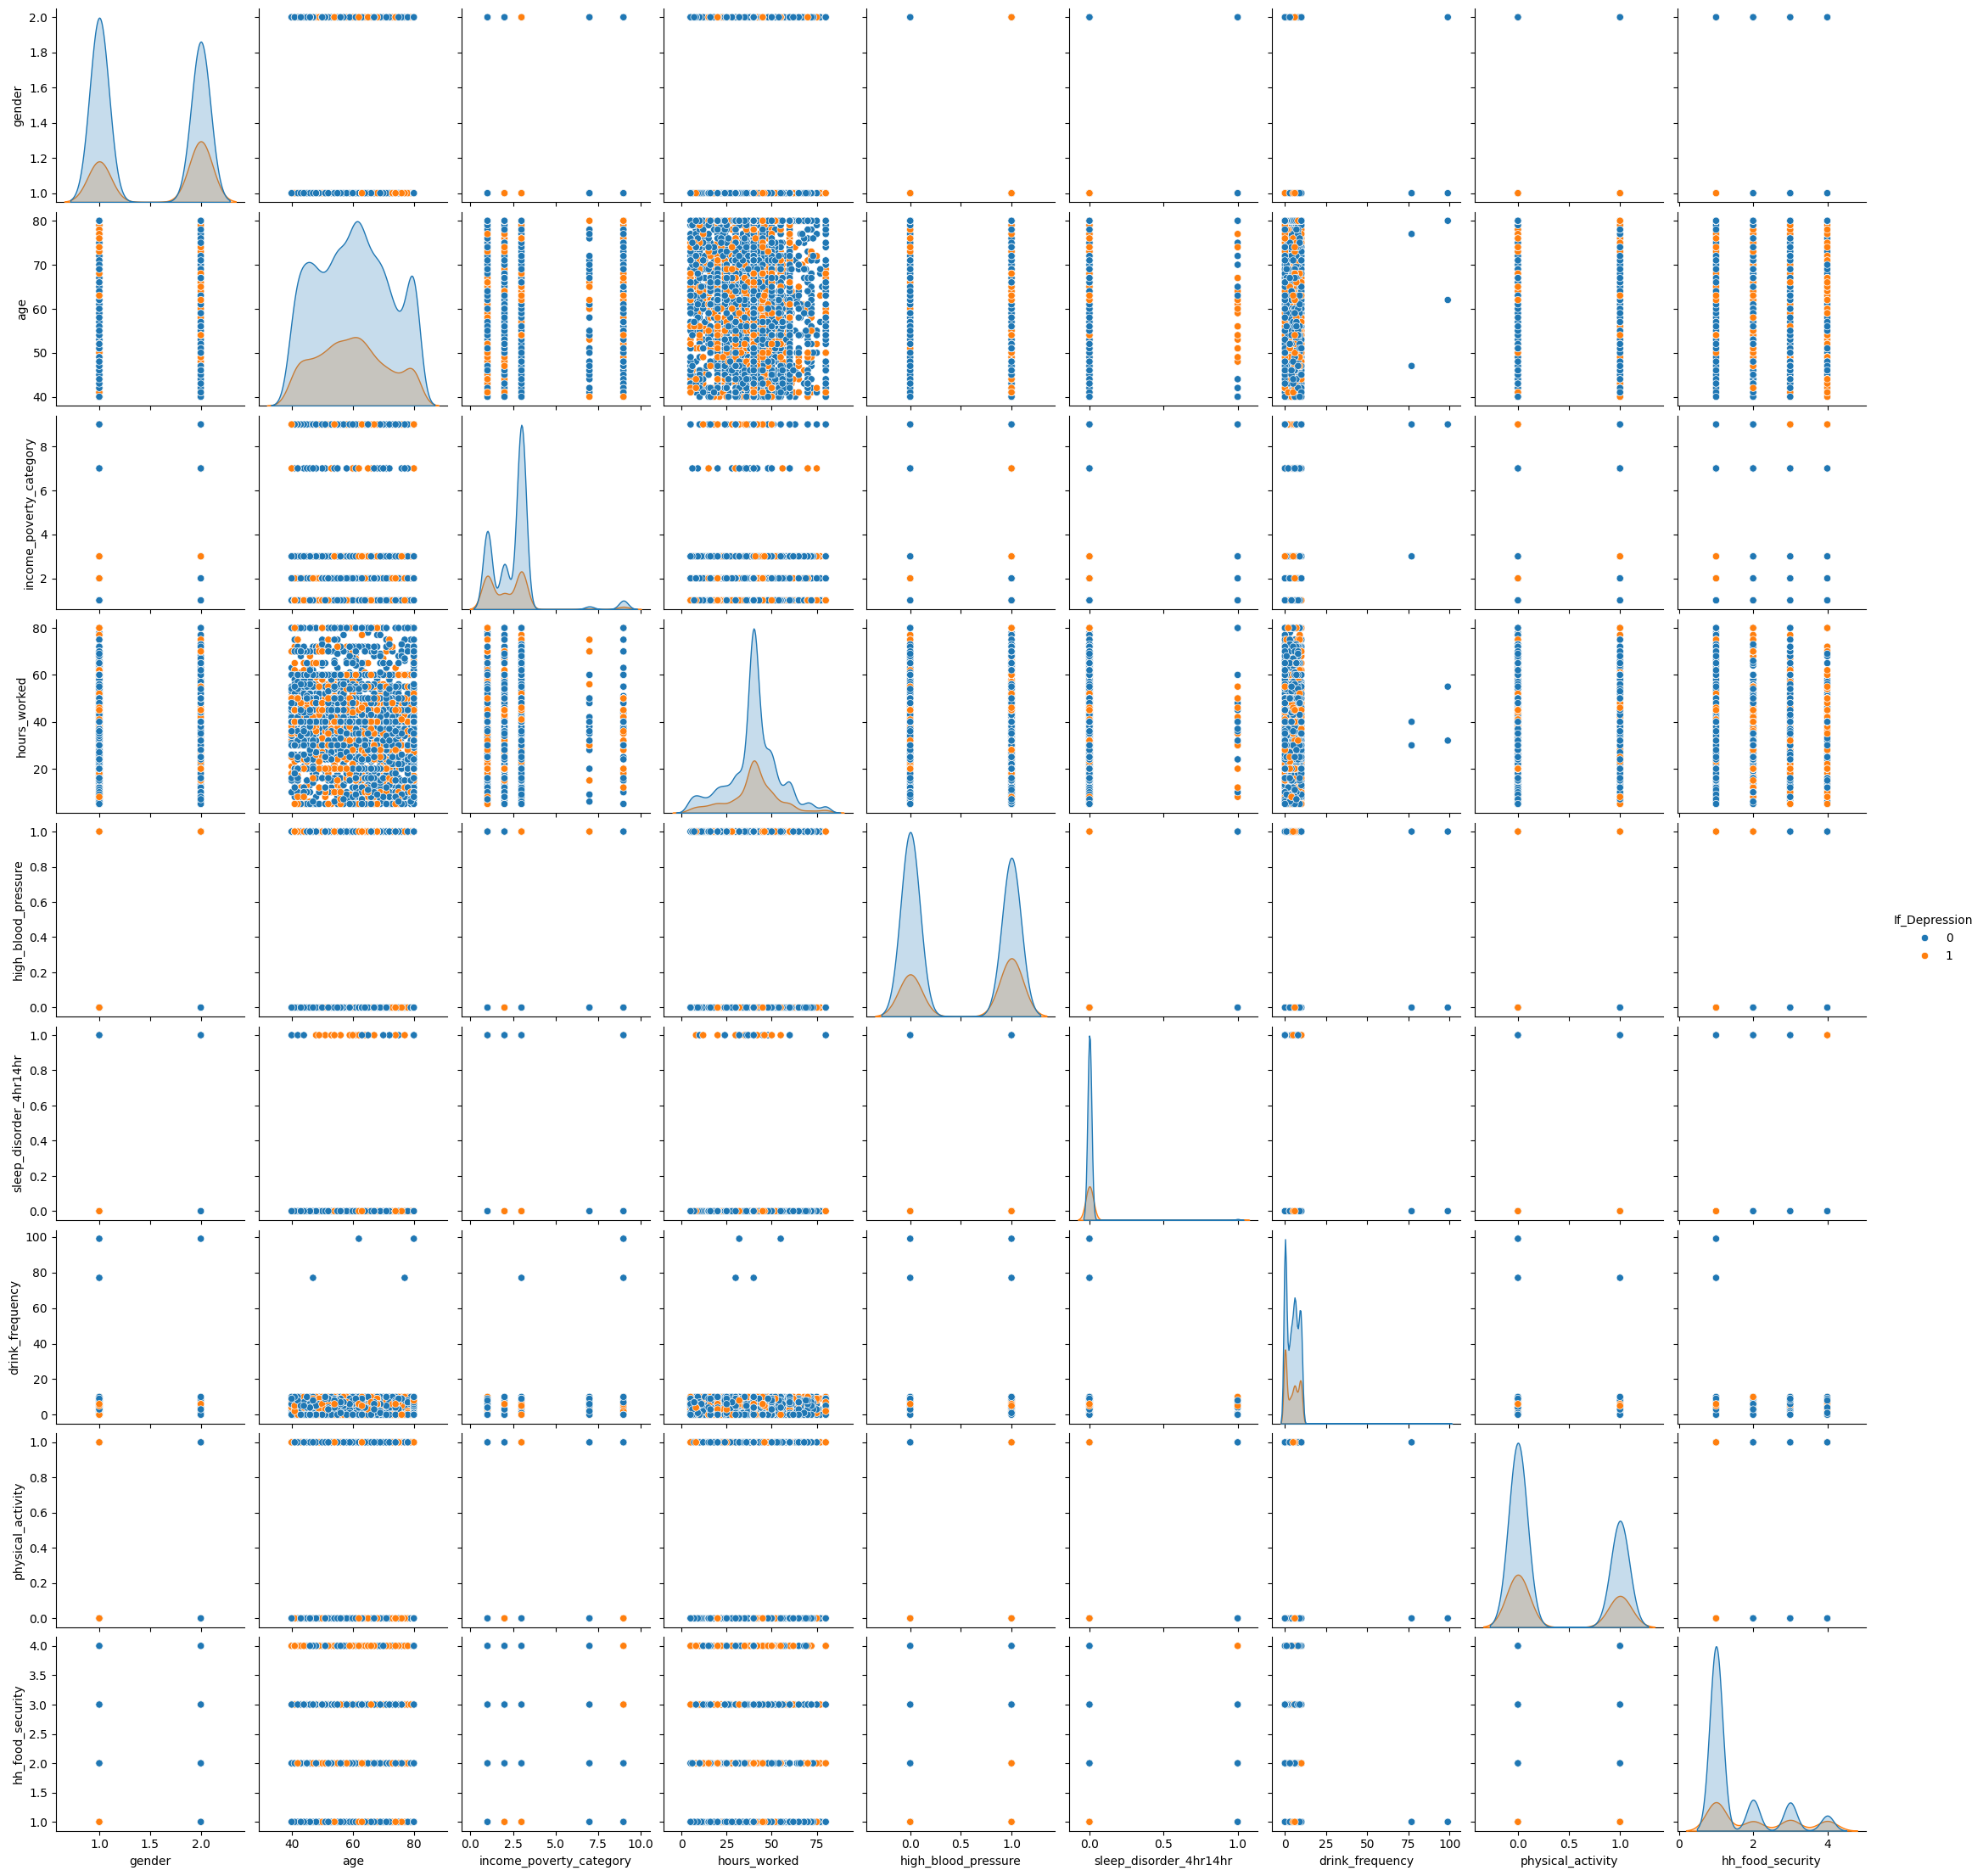

In [33]:
# pairplot of selected variables
df_corr = df_corr[['gender', 'age', 'income_poverty_category', 'hours_worked',
'high_blood_pressure', 'sleep_disorder_4hr14hr', 
'drink_frequency','physical_activity', 'hh_food_security', 'If_Depression']]
sns.pairplot(df_corr, hue = 'If_Depression')

Similar to the heatmap, the pair plot depicts the correlation between variables - most shows weak correlation. The pair plot further adds in a third dimension of the occurrence of depression.

- Age, gender and depression: It is observed that older males are more associated with having depression.


- Sleeping disorder, age, and depression: it seems mid-aged people between mid-40s and 60 are highly associated with depression occurrence.


- Food security and depression: Lower food security is in general associated with higher chance of having depression.


## Machine Learning Modelling and Prediction

### Preprocessing

In [34]:
# Dropping the specified columns: 'Depression_Severity' and 'Depression_Severity_Score'
data = merged_df.drop(columns=['Depression_Severity', 'Depression_Severity_Score', 'SEQN'])

# Display the first few rows of the updated DataFrame to confirm the drop
data.head()

gender   age  income_poverty_level  income_poverty_category  type_of_work  \
0     1.0  49.0                  1.20                      1.0           4.0   
1     1.0  68.0                  1.20                      1.0           4.0   
2     1.0  76.0                  3.18                      3.0           4.0   
3     2.0  44.0                  0.90                      7.0           1.0   
4     2.0  68.0                  4.80                      3.0           1.0   

   hours_worked  overall_work_schedule  main_reason_did_not_work_last_week  \
0          40.0                    2.0                                 4.0   
1          45.0                    1.0                                 3.0   
2          49.0                    1.0                                 1.0   
3          38.0                    5.0                                 4.0   
4          60.0                    2.0                                 1.0   

    mbi  high_blood_pressure  ...  healthcare_received  anemia  overweight  \
0  29.7                    0  ...         2.000000e+00       0           0   
1  30.2                    1  ...         5.397605e-79       0           1   
2  26.6                    1  ...         8.000000e+00       1           0   
3  39.1                    0  ...         1.000000e+00       0           1   
4  28.1                    1  ...         2.000000e+00       0           0   

   cancer  sleep_disorder_4hr14hr  smoking_cigarette  drink_frequency  \
0       0                       0                  1     5.397605e-79   
1       0                       0                  0     4.000000e+00   
2       1                       0                  1     5.397605e-79   
3       0                       0                  0     8.000000e+00   
4       0                       0                  0     5.397605e-79   

   vaccination  physical_activity  If_Depression  
0            0                  0              1  
1            0                  1              0  
2            0                  0              1  
3            0                  1              0  
4            0                  1              0  

[5 rows x 28 columns]

In [35]:
values_to_filter_corrected = [7, 9, 77, 99, 77777, 99999]
# Initialize a dictionary to store the results, structured by column and value
column_value_counts = {column: {value: 0 for value in values_to_filter_corrected} for column in data.columns}

# Loop through each column and each value to count occurrences
for column in data.columns:
    for value in values_to_filter_corrected:
        column_value_counts[column][value] = (data[column] == value).sum()

# Filter out columns where no specified values are found
column_value_counts = {col: vals for col, vals in column_value_counts.items() if any(v > 0 for v in vals.values())}

column_value_counts


{'age': {7: 0, 9: 0, 77: 66, 99: 0, 77777: 0, 99999: 0},
 'income_poverty_category': {7: 43, 9: 148, 77: 0, 99: 0, 77777: 0, 99999: 0},
 'type_of_work': {7: 0, 9: 2, 77: 0, 99: 0, 77777: 0, 99999: 0},
 'hours_worked': {7: 13, 9: 19, 77: 5, 99: 0, 77777: 0, 99999: 0},
 'main_reason_did_not_work_last_week': {7: 354,
  9: 0,
  77: 2,
  99: 8,
  77777: 0,
  99999: 0},
 'health_condition': {7: 1, 9: 2, 77: 0, 99: 0, 77777: 0, 99999: 0},
 'healthcare_received': {7: 95, 9: 0, 77: 0, 99: 11, 77777: 0, 99999: 0},
 'drink_frequency': {7: 375, 9: 537, 77: 2, 99: 2, 77777: 0, 99999: 0}}

## columns need to correct

- type_of_work 9: 2

- overall_work_schedule 7: 2

- hours_worked 99999:1

- main_reason_did_not_work_last_week 77: 1, 99: 5

- health_condition 7: 1, 9: 2

- healthcare_received 99: 1

- drink_frequency 77: 3, 99: 2

only hours_worked is numerical, others are all categorical data

check distribution of hours_worked

<AxesSubplot: >

<Figure size 1000x600 with 0 Axes>

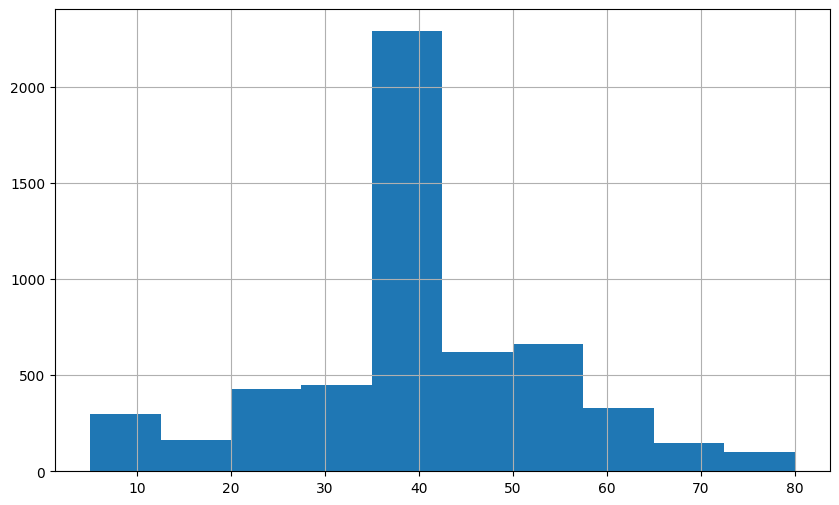

In [36]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
filtered_hours_worked_99999 = data[data['hours_worked'] != 99999]

# Plotting the histogram
plt.figure(figsize=(10, 6))  # Set the size of the plot
filtered_hours_worked_99999['hours_worked'].hist(bins=10) 

In [37]:
# replace 99999 with mean
mean_hours_worked = data[data['hours_worked'] != 99999]['hours_worked'].mean()

# Replace the outlier value with the mean
data['hours_worked'] = data['hours_worked'].replace(99999, mean_hours_worked)

In [38]:
# replace others with mode
# Define the columns and their values to replace
replacement_info = {
    "type_of_work": [9],
    "overall_work_schedule": [7],
    "main_reason_did_not_work_last_week": [77, 99],
    "health_condition": [7, 9],
    "healthcare_received": [99],
    "drink_frequency": [77, 99]
}

# Apply the replacements
for column, values_to_replace in replacement_info.items():
    mode_value = data[column].mode()[0]  # Compute the mode of the column
    for value in values_to_replace:
        data.loc[data[column] == value, column] = mode_value  # Replace specified values with the mode

# Verify the changes by displaying the unique values of the columns after replacements
{column: data[column].unique() for column in replacement_info.keys()}


{'type_of_work': array([4., 1., 3., 2.]),
 'overall_work_schedule': array([2., 1., 5., 3.]),
 'main_reason_did_not_work_last_week': array([4., 3., 1., 7., 2.]),
 'health_condition': array([4., 3., 2., 1., 5.]),
 'healthcare_received': array([2.00000000e+00, 5.39760535e-79, 8.00000000e+00, 1.00000000e+00,
        7.00000000e+00, 3.00000000e+00, 6.00000000e+00, 4.00000000e+00,
        5.00000000e+00]),
 'drink_frequency': array([5.39760535e-79, 4.00000000e+00, 8.00000000e+00, 9.00000000e+00,
        1.00000000e+00, 1.00000000e+01, 6.00000000e+00, 7.00000000e+00,
        3.00000000e+00, 5.00000000e+00, 2.00000000e+00])}

z-score scaling for all numerical predictors

In [39]:
# 
from sklearn.preprocessing import StandardScaler

# List of columns to be scaled
columns_to_scale = ["age", "income_poverty_level", "hours_worked", "mbi", "drink_frequency", "healthcare_received"]

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Display the mean and standard deviation of the scaled columns to verify scaling
scaled_stats = {column: {'mean': round(data[column].mean(), 2), 'std': round(data[column].std(), 2)} for column in columns_to_scale}
scaled_stats


{'age': {'mean': 0.0, 'std': 1.0},
 'income_poverty_level': {'mean': -0.0, 'std': 1.0},
 'hours_worked': {'mean': 0.0, 'std': 1.0},
 'mbi': {'mean': 0.0, 'std': 1.0},
 'drink_frequency': {'mean': -0.0, 'std': 1.0},
 'healthcare_received': {'mean': 0.0, 'std': 1.0}}

one-hot encoding for all categorical predictors

In [40]:
# Identify columns with exactly 2 unique values
unique_values = {col: data[col].unique() for col in data.columns}
binary_columns = [col for col, values in unique_values.items() if len(values) == 2]

# Apply one-hot encoding
encoded_data = data.copy()
for col in binary_columns:
    encoded_data = pd.get_dummies(encoded_data, columns=[col], drop_first=True)

# Show the result with updated column names
encoded_data.head()


age  income_poverty_level  income_poverty_category  type_of_work  \
0 -0.940538             -0.832054                      1.0           4.0   
1  0.675959             -0.832054                      1.0           4.0   
2  1.356588              0.443105                      3.0           4.0   
3 -1.365931             -1.025259                      7.0           1.0   
4  0.675959              1.486416                      3.0           1.0   

   hours_worked  overall_work_schedule  main_reason_did_not_work_last_week  \
0      0.001929                    2.0                                 4.0   
1      0.354459                    1.0                                 3.0   
2      0.636483                    1.0                                 1.0   
3     -0.139083                    5.0                                 4.0   
4      1.412050                    2.0                                 1.0   

        mbi  hh_food_security  health_condition  ...  health_insurance_1  \
0 -0.087179               3.0               4.0  ...                True   
1 -0.018160               3.0               3.0  ...                True   
2 -0.515100               1.0               4.0  ...                True   
3  1.210385               1.0               4.0  ...               False   
4 -0.308042               1.0               3.0  ...                True   

   hepatitis_1  anemia_1  overweight_1  cancer_1  sleep_disorder_4hr14hr_1  \
0        False     False         False     False                     False   
1        False     False          True     False                     False   
2        False      True         False      True                     False   
3        False     False          True     False                     False   
4        False     False         False     False                     False   

   smoking_cigarette_1  vaccination_1  physical_activity_1  If_Depression_1  
0                 True          False                False             True  
1                False          False                 True            False  
2                 True          False                False             True  
3                False          False                 True            False  
4                False          False                 True            False  

[5 rows x 28 columns]

In [41]:
from sklearn.preprocessing import OneHotEncoder
# Applying OneHotEncoder with drop='first' to avoid multicollinearity
unique_values_count = encoded_data.nunique()
categorical_columns = unique_values_count[(unique_values_count > 2) & (unique_values_count < 8)].index.tolist()

encoder_drop_first = OneHotEncoder(sparse=False, drop='first')
encoded_data_drop_first = pd.DataFrame(encoder_drop_first.fit_transform(encoded_data[categorical_columns]),
                                       columns=encoder_drop_first.get_feature_names_out(categorical_columns))

# Combine the newly encoded columns back with the original dataset
data_encoded_drop_first = encoded_data.drop(columns=categorical_columns)
data_encoded_drop_first = pd.concat([data_encoded_drop_first, encoded_data_drop_first], axis=1)

# Display the new dataframe structure
data_encoded_drop_first.head()

age  income_poverty_level  hours_worked       mbi  \
0 -0.940538             -0.832054      0.001929 -0.087179   
1  0.675959             -0.832054      0.354459 -0.018160   
2  1.356588              0.443105      0.636483 -0.515100   
3 -1.365931             -1.025259     -0.139083  1.210385   
4  0.675959              1.486416      1.412050 -0.308042   

   healthcare_received  drink_frequency  gender_2.0  high_blood_pressure_1  \
0            -0.334493        -1.234640       False                  False   
1            -1.334050        -0.124492       False                   True   
2             2.664181        -1.234640       False                   True   
3            -0.834272         0.985657        True                  False   
4            -0.334493        -1.234640        True                   True   

   high_Cholestrol_1  pain_in_chest_1  ...  \
0               True             True  ...   
1               True            False  ...   
2               True             True  ...   
3               True            False  ...   
4              False            False  ...   

   main_reason_did_not_work_last_week_3.0  \
0                                     0.0   
1                                     1.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   main_reason_did_not_work_last_week_4.0  \
0                                     1.0   
1                                     0.0   
2                                     0.0   
3                                     1.0   
4                                     0.0   

   main_reason_did_not_work_last_week_7.0  hh_food_security_2.0  \
0                                     0.0                   0.0   
1                                     0.0                   0.0   
2                                     0.0                   0.0   
3                                     0.0                   0.0   
4                                     0.0                   0.0   

   hh_food_security_3.0  hh_food_security_4.0  health_condition_2.0  \
0                   1.0                   0.0                   0.0   
1                   1.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   health_condition_3.0  health_condition_4.0  health_condition_5.0  
0                   0.0                   1.0                   0.0  
1                   1.0                   0.0                   0.0  
2                   0.0                   1.0                   0.0  
3                   0.0                   1.0                   0.0  
4                   1.0                   0.0                   0.0  

[5 rows x 43 columns]

In [42]:
datatotal_new = data_encoded_drop_first
# datatotal_new.to_csv('datatotal_new.csv', index=False)
datatotal_new.shape

(5482, 43)

to get health and behavioral data

In [43]:
# Define the new column groups based on the actual column names
datatotal_new= pd.read_csv('datatotal_new.csv')
response_variable = ['If_Depression_1']

social_factors = [
    'gender_2.0', 'age', 'income_poverty_level',
    'income_poverty_category_2.0', 'income_poverty_category_3.0', 'income_poverty_category_7.0', 'income_poverty_category_9.0',
    'type_of_work_2.0', 'type_of_work_3.0', 'type_of_work_4.0',
    'hours_worked',
    'overall_work_schedule_2.0', 'overall_work_schedule_3.0', 'overall_work_schedule_5.0',
    'main_reason_did_not_work_last_week_2.0', 'main_reason_did_not_work_last_week_3.0', 'main_reason_did_not_work_last_week_4.0', 'main_reason_did_not_work_last_week_7.0'
]
health_factors = [
    'mbi', 'high_blood_pressure_1', 'high_Cholestrol_1', 'pain_in_chest_1', 'HIV_1', 'diabetes_1',
    'hepatitis_1', 'health_condition_2.0', 'health_condition_3.0', 'health_condition_4.0', 'health_condition_5.0',
    'anemia_1', 'overweight_1', 'cancer_1'
]
behavioral_factors = [
    'sleep_disorder_4hr14hr_1', 'smoking_cigarette_1', 'drink_frequency', 'vaccination_1',
    'physical_activity_1', 'hh_food_security_2.0', 'hh_food_security_3.0', 'hh_food_security_4.0',
    'health_insurance_1', 'healthcare_received'
]

y= datatotal_new['If_Depression_1']
X = datatotal_new.drop(columns=['If_Depression_1'])

# Create the first dataframe (behavioral factors)
X1=df_behavioral = datatotal_new[social_factors+behavioral_factors]

# Create the second dataframe (health factors)
X2=df_health =datatotal_new[social_factors+health_factors]

# Create the third dataframe (health&behavioral factors)
X3=datatotal_new[social_factors+health_factors+behavioral_factors]

X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=123)
X_train2, X_test2, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=123)
X_train3, X_test3, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=123)

### K-Nearest Neighbor (KNN)

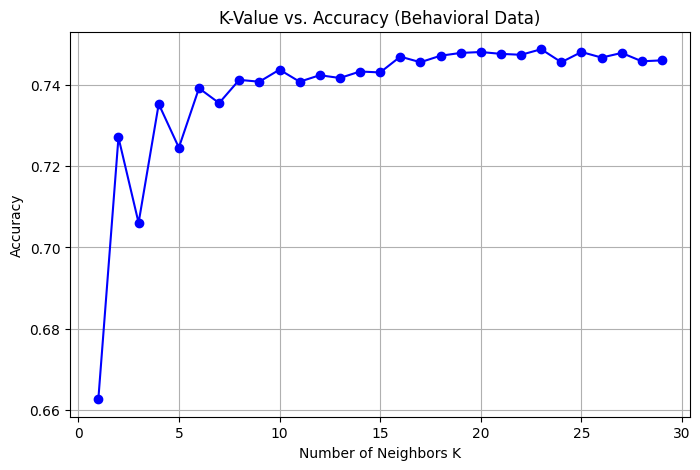

The best K picked by Nested cross validation for KNN model is: 23
The best score of KNN model is: 0.7486887115165336
Train score: 0.7587229190421892
Test score: 0.7329079307201458


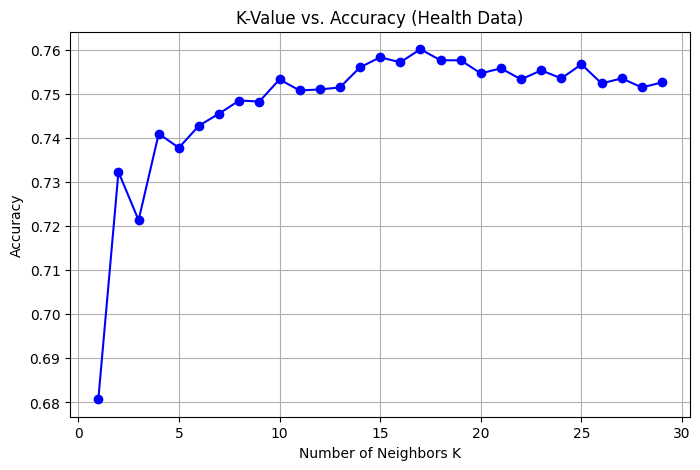

The best K picked by Nested cross validation for KNN model is: 17
The best score of KNN model is: 0.7600912200684151
Train score: 0.7751425313568985
Test score: 0.7465815861440291


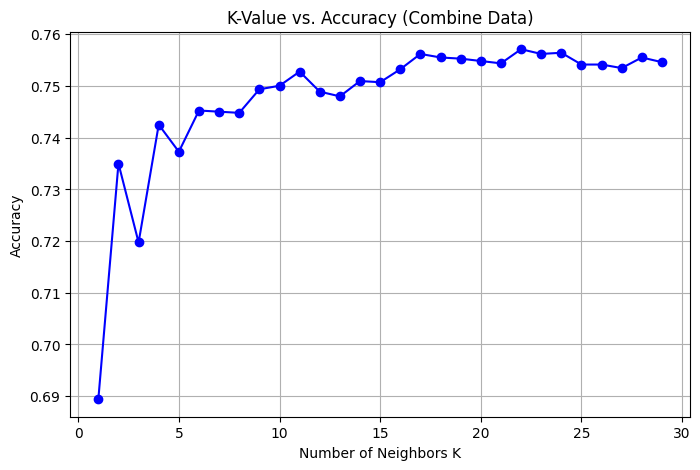

The best K picked by Nested cross validation for KNN model is: 22
The best score of KNN model is: 0.7571265678449259
Train score: 0.7671607753705816
Test score: 0.7474931631722881


In [44]:
def train_and_plot(X_train, X_test, y_train, y_test, title):
    # Set up the KNN model and parameter tuning
    knn = KNeighborsClassifier()
    param_grid = {'n_neighbors': np.arange(1, 30)}  # Tuning

    # Set up GridSearchCV for inner loop hyperparameter tuning
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Find the best 'k' parameter
    best_k = grid_search.best_params_['n_neighbors']
    best_k_score = grid_search.best_score_

    # Calculate train score and test score
    train_score = grid_search.best_estimator_.score(X_train, y_train)
    test_score = grid_search.best_estimator_.score(X_test, y_test)

    # Plot the results of hyperparameter tuning
    mean_scores = grid_search.cv_results_['mean_test_score']
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 30), mean_scores, marker='o', linestyle='-', color='blue')
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Accuracy')
    plt.title('K-Value vs. Accuracy (' + title + ')')
    plt.grid(True)
    plt.show()

    print('The best K picked by Nested cross validation for KNN model is:', best_k)
    print('The best score of KNN model is:', best_k_score)
    print('Train score:', train_score)
    print('Test score:', test_score)

X_train1_ = np.ascontiguousarray(X_train1)
X_test1_ = np.ascontiguousarray(X_test1)
X_train2_ = np.ascontiguousarray(X_train2)
X_test2_ = np.ascontiguousarray(X_test2)
X_train3_ = np.ascontiguousarray(X_train3)
X_test3_ = np.ascontiguousarray(X_test3)


# Train the model and plot the results on three datasets
train_and_plot(X_train1_, X_test1_, y_train, y_test, 'Behavioral Data')
train_and_plot(X_train2_, X_test2_, y_train, y_test, 'Health Data')
train_and_plot(X_train3_, X_test3_, y_train, y_test, 'Combine Data')


### Decision Tree & Random Forest

In [45]:
dt=DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, random_state=0)
rf=RandomForestClassifier(n_estimators=100, max_depth=2, min_samples_leaf=10, random_state=0)

Test score for DecisionTree on dataset 1: 0.7256153144940748


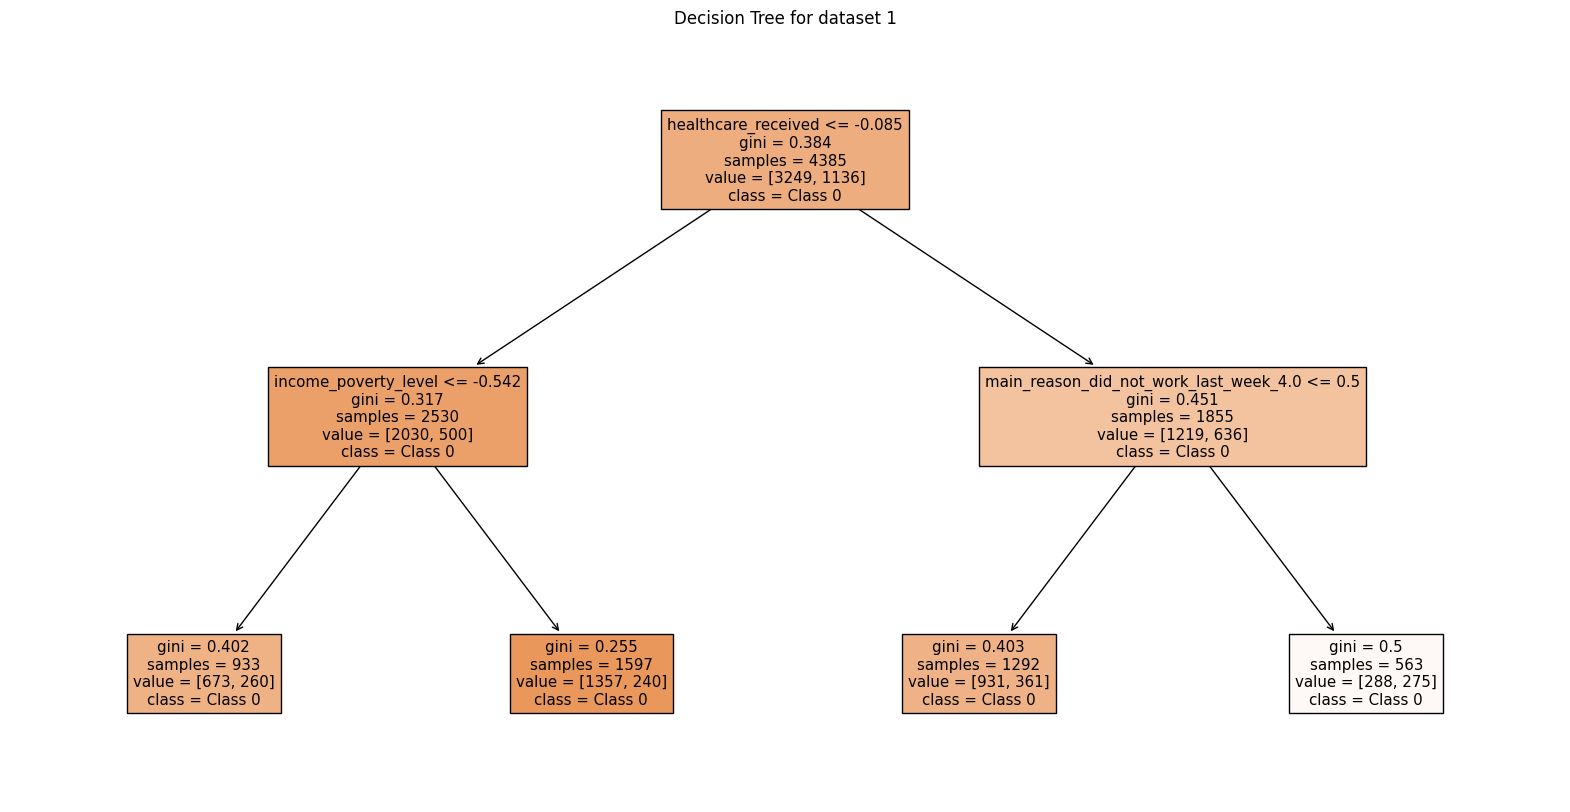

Test score for RandomForest on dataset 1: 0.7256153144940748


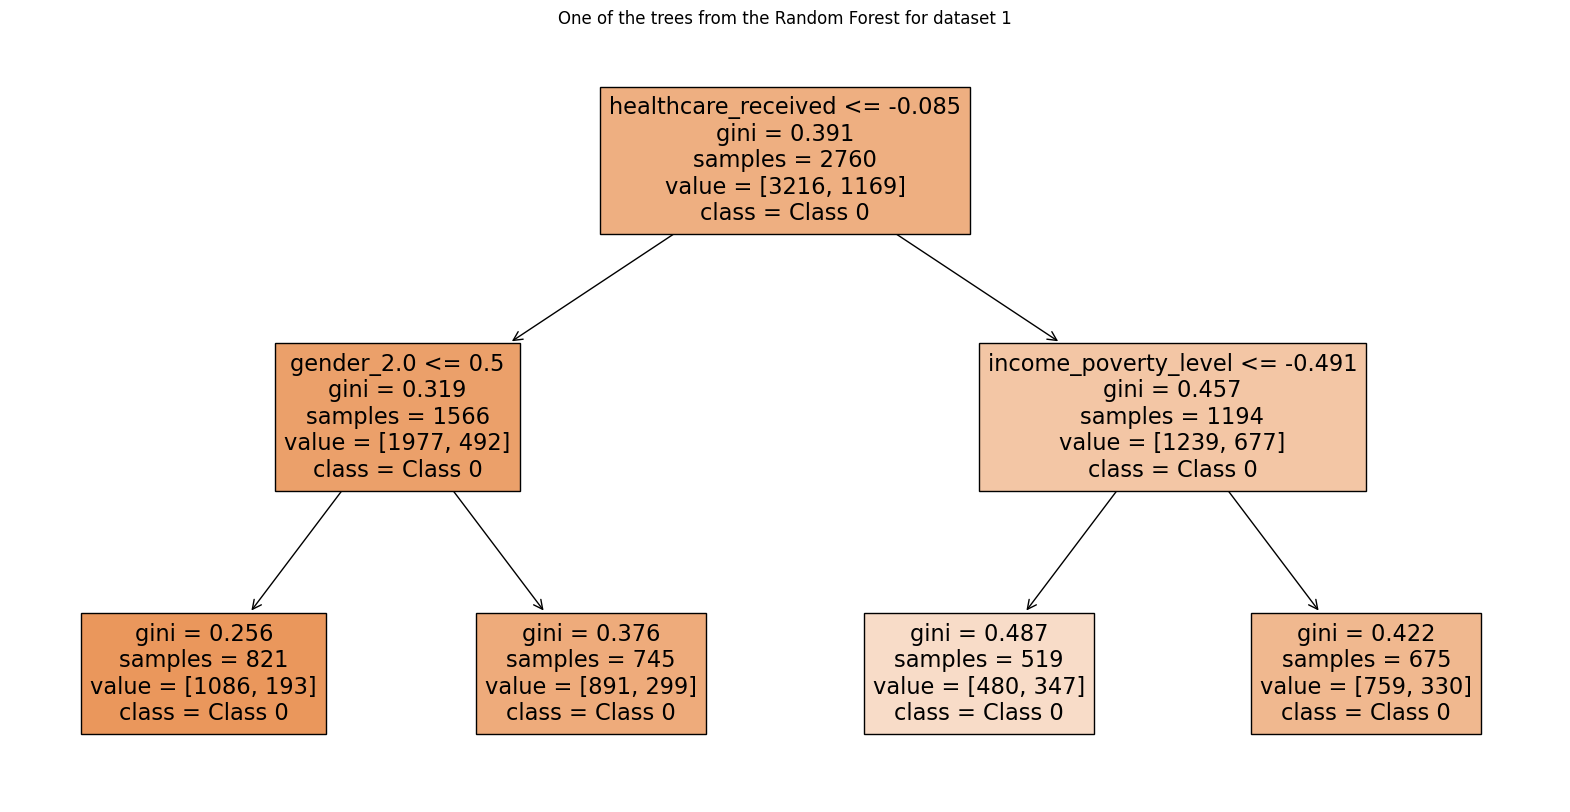

Test score for DecisionTree on dataset 2: 0.7256153144940748


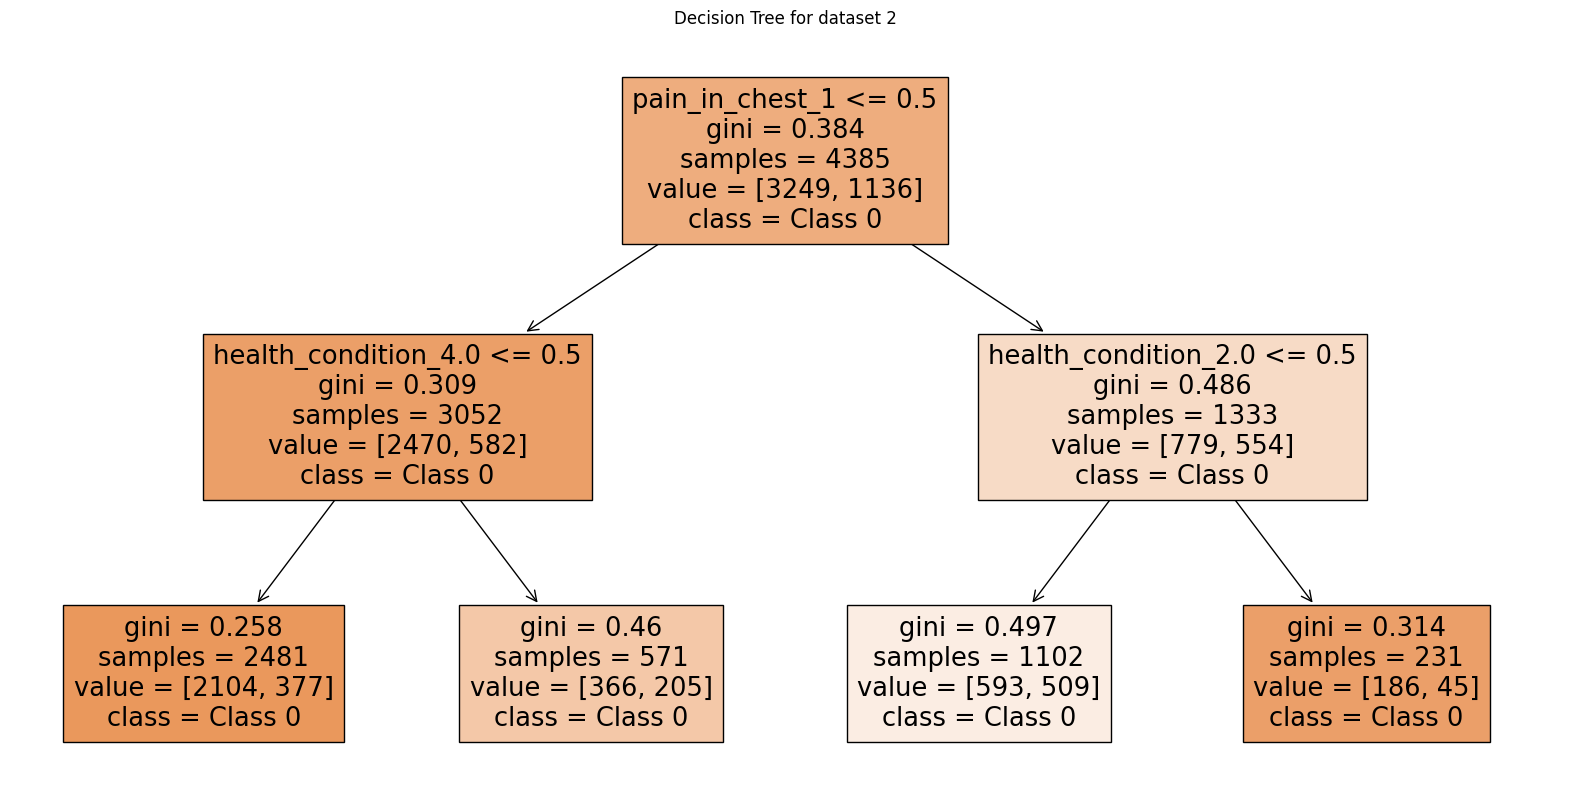

Test score for RandomForest on dataset 2: 0.7256153144940748


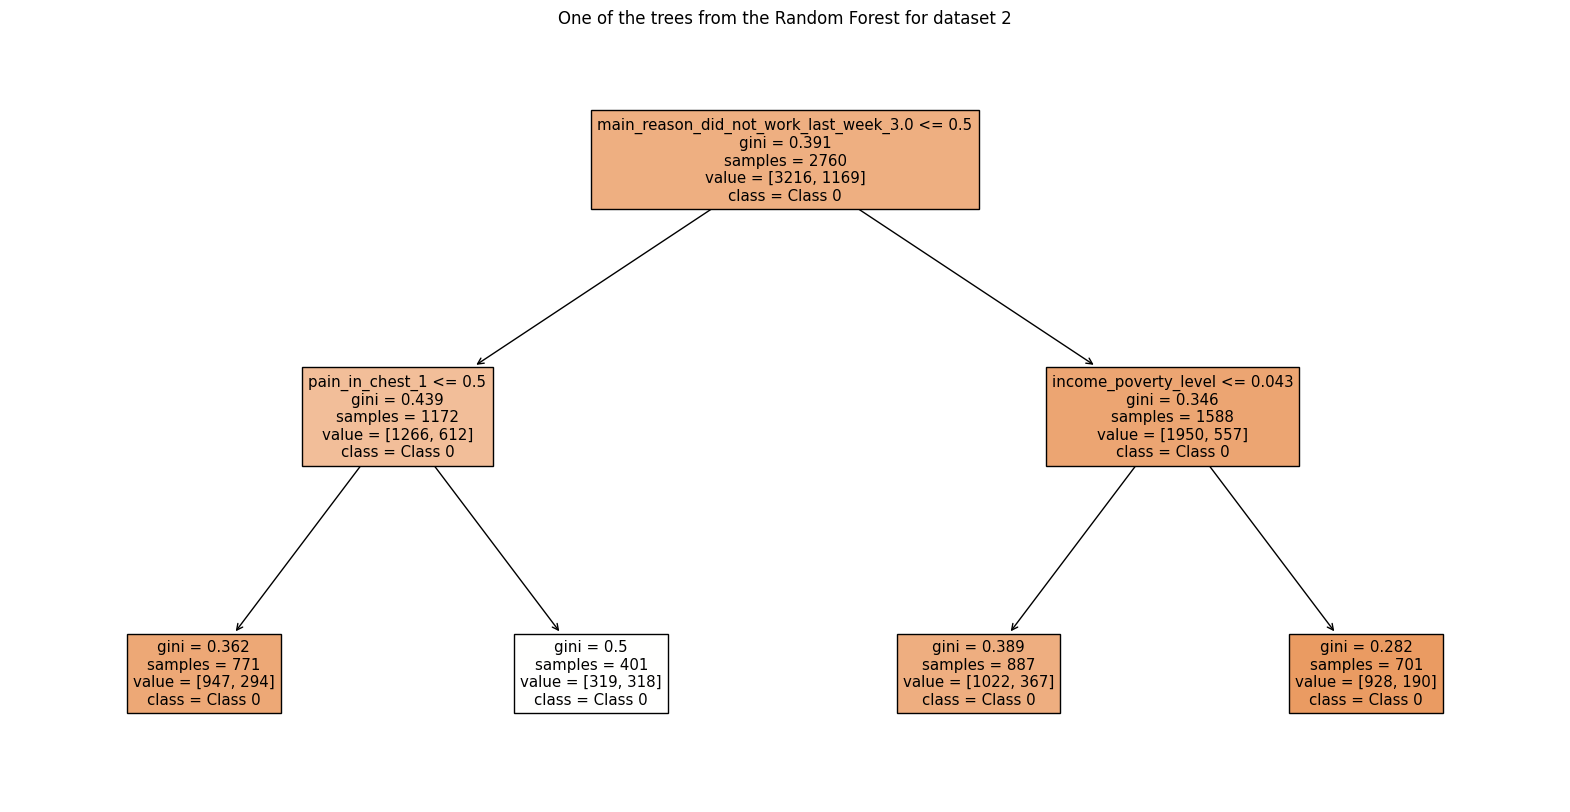

Test score for DecisionTree on dataset 3: 0.7256153144940748


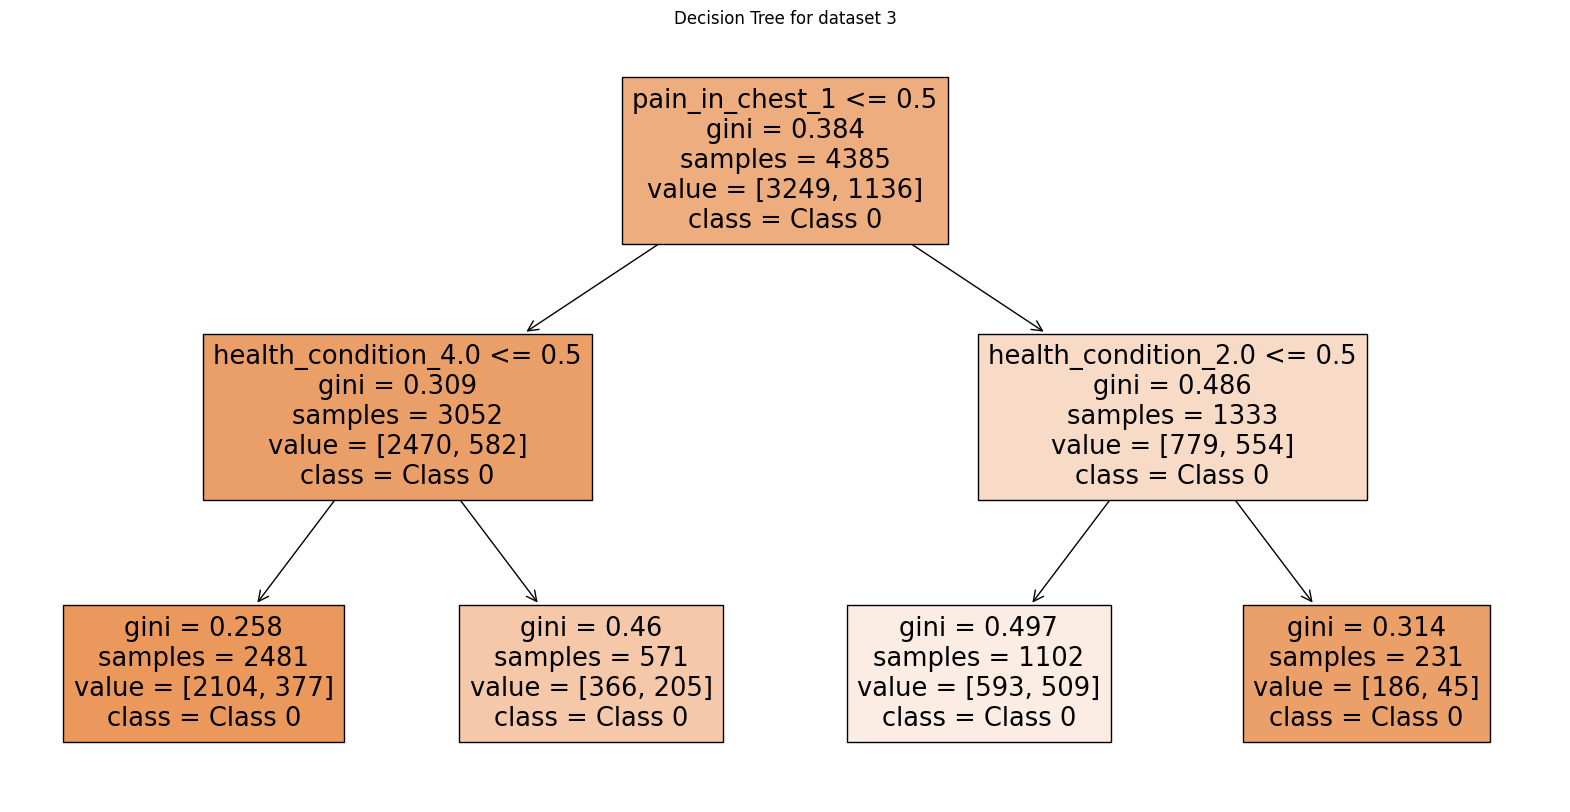

Test score for RandomForest on dataset 3: 0.7256153144940748


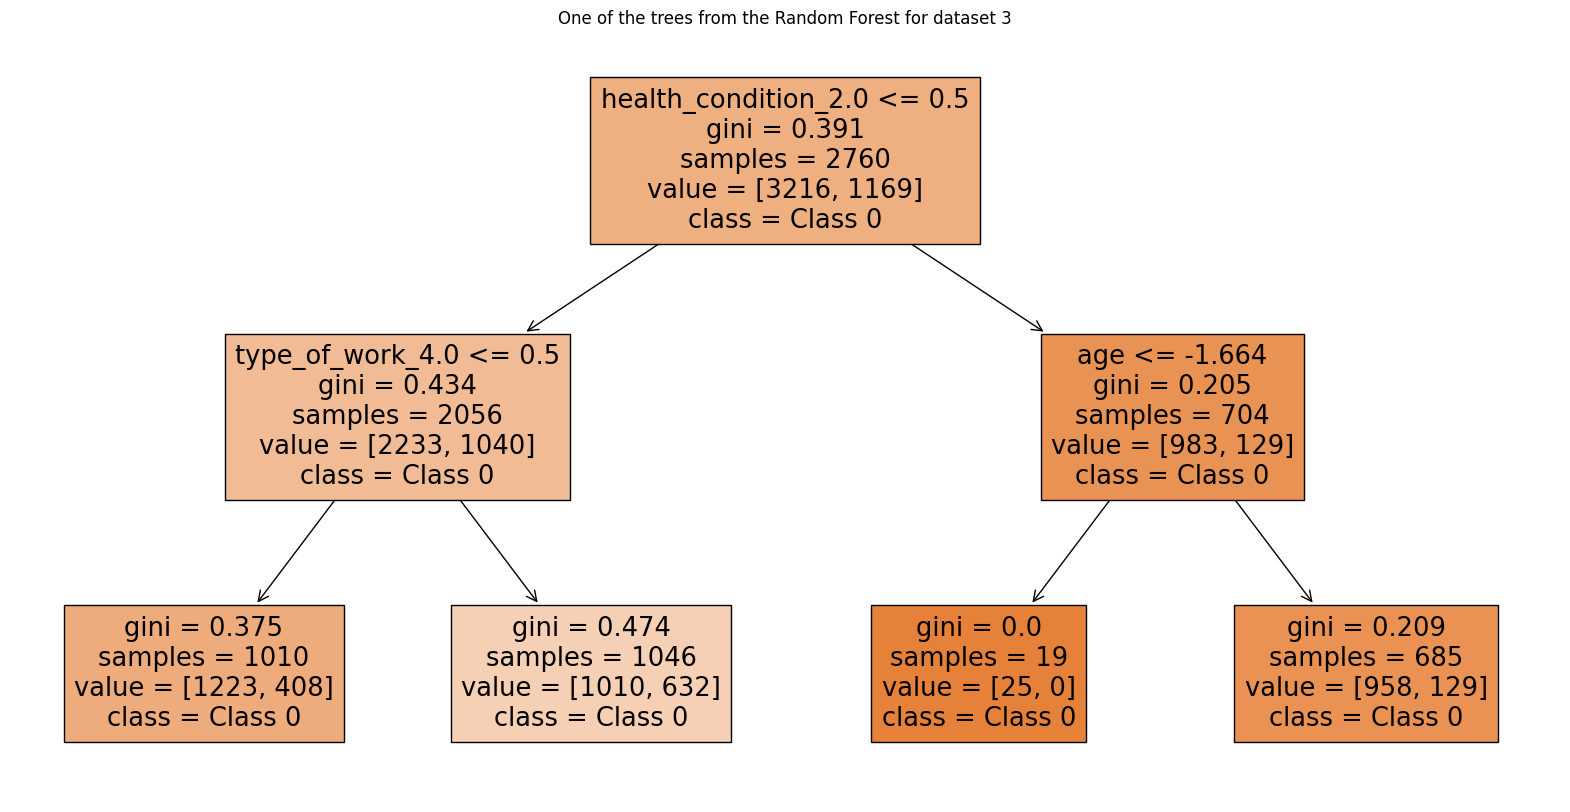

In [46]:
from sklearn.tree import plot_tree

train_test_sets = [(X_train1, X_test1), (X_train2, X_test2), (X_train3, X_test3)]
classifiers = [dt, rf]

for i, (X_train, X_test) in enumerate(train_test_sets, 1):
    for j, clf in enumerate(classifiers, 1):
        clf_name = 'DecisionTree' if j == 1 else 'RandomForest'
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(f'Test score for {clf_name} on dataset {i}: {score}')

        if isinstance(clf, DecisionTreeClassifier):
            plt.figure(figsize=(20,10))
            plot_tree(clf, filled=True, feature_names=X_train.columns.tolist(), class_names=['Class 0', 'Class 1'])
            plt.title(f"Decision Tree for dataset {i}")
            plt.show()
        elif isinstance(clf, RandomForestClassifier):
            plt.figure(figsize=(20,10))
            plot_tree(clf.estimators_[0], filled=True, feature_names=X_train.columns.tolist(), class_names=['Class 0', 'Class 1'])
            plt.title(f"One of the trees from the Random Forest for dataset {i}")
            plt.show()


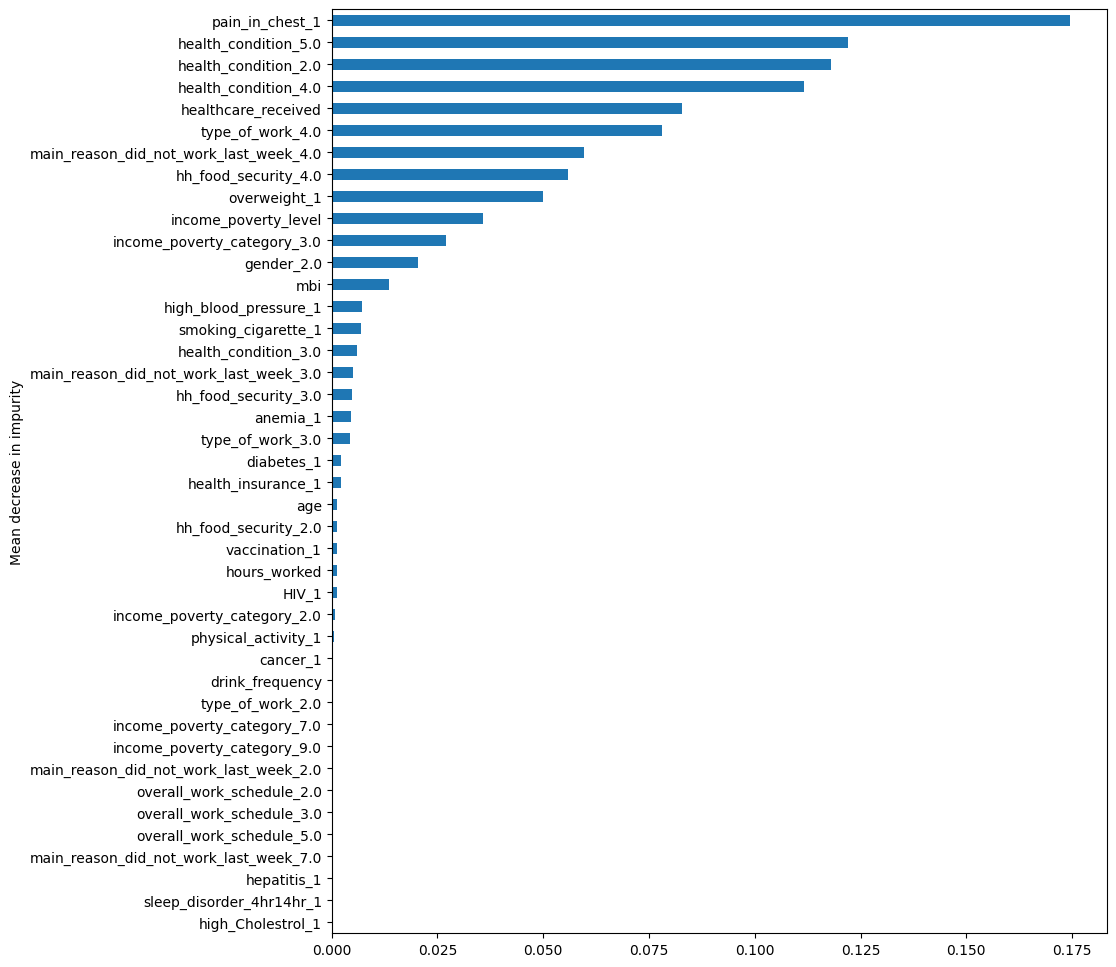

In [47]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index= rf.feature_names_in_)
plt.figure(figsize=(10,12))
forest_importances.sort_values(ascending = True).plot.barh()
plt.ylabel("Mean decrease in impurity")
plt.show()

### Logistic Regression Model

Behavioral variables

In [48]:
# datatotal_new = pd.read_csv("datatotal_new.csv")

# behavioral
X = df_behavioral
y = datatotal_new[['If_Depression_1']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# logistic regression model
lr = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
print("LR cross val score",cross_val_score(lr, X_train, y_train, cv=5).mean())

y_pred = lr.predict(X_train)
# mse_score = mean_squared_error(y_train, y_pred)
# print("Misclassification rate for training data is", mse_score)

# Calculate classification accuracy on the training data
accuracy_train = accuracy_score(y_train, y_pred)
print("Classification accuracy for training data is:", accuracy_train)

# Generating confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)
print('the confusion matrix is: \n', conf_matrix)

# Output classification reports
print("Classification report for training data:")
print(classification_report(y_train, y_pred))

y_pred = lr.predict(X_test)
# mse_score = mean_squared_error(y_test, y_pred)
# print("Misclassification rate for testing data is", mse_score)

# Calculate classification accuracy on the training data
accuracy_test = accuracy_score(y_test, y_pred)
print("Classification accuracy for testing data is:", accuracy_test)

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('the confusion matrix is: \n', conf_matrix)

# Output classification reports
print("Classification report for testing data:")
print(classification_report(y_test, y_pred))

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Health variables

In [49]:
# datatotal_new = pd.read_csv("datatotal_new.csv")

# behavioral
X = df_health
y = datatotal_new[['If_Depression_1']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# logistic regression model
lr = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
print("LR cross val score",cross_val_score(lr, X_train, y_train, cv=5).mean())

y_pred = lr.predict(X_train)
# mse_score = mean_squared_error(y_train, y_pred)
# print("Misclassification rate for training data is", mse_score)

# Calculate classification accuracy on the training data
accuracy_train = accuracy_score(y_train, y_pred)
print("Classification accuracy for training data is:", accuracy_train)

# Generating confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)
print('the confusion matrix is: \n', conf_matrix)

# Output classification reports
print("Classification report for training data:")
print(classification_report(y_train, y_pred))

y_pred = lr.predict(X_test)
# mse_score = mean_squared_error(y_test, y_pred)
# print("Misclassification rate for testing data is", mse_score)

# Calculate classification accuracy on the training data
accuracy_test = accuracy_score(y_test, y_pred)
print("Classification accuracy for testing data is:", accuracy_test)

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('the confusion matrix is: \n', conf_matrix)

# Output classification reports
print("Classification report for testing data:")
print(classification_report(y_test, y_pred))

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Combined variables

In [50]:
datatotal_new = pd.read_csv("datatotal_new.csv")

X = datatotal_new.drop(columns=['If_Depression_1'])
y = datatotal_new[['If_Depression_1']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# logistic regression model
lr = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
print("LR cross val score",cross_val_score(lr, X_train, y_train, cv=5).mean())

y_pred = lr.predict(X_train)
# mse_score = mean_squared_error(y_train, y_pred)
# print("Misclassification rate for training data is", mse_score)

# Calculate classification accuracy on the training data
accuracy_train = accuracy_score(y_train, y_pred)
print("Classification accuracy for training data is:", accuracy_train)

# Generating confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)
print('the confusion matrix is: \n', conf_matrix)

# Output classification reports
print("Classification report for training data:")
print(classification_report(y_train, y_pred))

y_pred = lr.predict(X_test)
# mse_score = mean_squared_error(y_test, y_pred)
# print("Misclassification rate for testing data is", mse_score)

# Calculate classification accuracy on the training data
accuracy_test = accuracy_score(y_test, y_pred)
print("Classification accuracy for testing data is:", accuracy_test)

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('the confusion matrix is: \n', conf_matrix)

# Output classification reports
print("Classification report for testing data:")
print(classification_report(y_test, y_pred))

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

### Support Vector Machine Model

Behavioral variable

In [51]:
# datatotal_new = pd.read_csv("datatotal_new.csv")

# Behavioral

# binary classification
X = df_behavioral
y = datatotal_new[['If_Depression_1']]

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# # hyperparameter tuning
# param_grid = {'C': np.logspace(-3, 2, 6),  # from .001 to 100
#              'gamma': np.logspace(-3, 2, 6)}
# svc_radial = SVC(kernel='rbf')
# grid_search = GridSearchCV(svc_radial, param_grid, cv=5,scoring='accuracy') # 1-misclassification rate
# grid_search.fit(X_train, y_train)
# print('Best parameters: {}'.format(grid_search.best_params_))

# preprocessing
# # standard scaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# dimension reduction
pca_n_list = [3, 5, 9, 15, 20, 25, 28]
accuracy_scores = []
for i in pca_n_list:
       pca = PCA(n_components=i, random_state=42)
       pca_X_train = pca.fit_transform(X_train) #X_train_scaled
       pca_X_test = pca.fit_transform(X_test) #X_test_scaled
       print(f"{i} components:")

    #    # hyperparameter tuning
    #    param_grid = {'C': np.logspace(-3, 2, 6),  # from .001 to 100
    #                 'gamma': np.logspace(-3, 2, 6)}
    #    svc_radial = SVC(kernel='rbf')
    #    grid_search = GridSearchCV(svc_radial, param_grid, cv=5,scoring='accuracy') # 1-misclassification rate
    #    grid_search.fit(X_train, y_train)
    #    print('Best parameters: {}'.format(grid_search.best_params_))

       # svm 
       svm = SVC(C = 50, kernel='rbf', degree=3, gamma=0.007)
       svm.fit(pca_X_train, y_train)
       print("SVM cross val score",cross_val_score(svm, pca_X_train, y_train, cv=5).mean())

       y_pred = svm.predict(pca_X_train)
       accuracy_train = accuracy_score(y_train, y_pred)
       print("Classification accuracy for training data is:", accuracy_train)

       # Generating confusion matrix
       conf_matrix = confusion_matrix(y_train, y_pred)
       print('the confusion matrix is: \n', conf_matrix)

       # Output classification reports
       print("Classification report for training data:")
       print(classification_report(y_train, y_pred))

       y_pred = svm.predict(pca_X_test)
       accuracy_test = accuracy_score(y_test, y_pred)
       print("Classification accuracy for testing data is:", accuracy_test)
       accuracy_scores.append(accuracy_test)

       # Generating confusion matrix
       conf_matrix = confusion_matrix(y_test, y_pred)
       print('the confusion matrix is: \n', conf_matrix)

       # Output classification reports
       print("Classification report for training data:")
       print(classification_report(y_test, y_pred))

print(accuracy_scores)

3 components:
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array

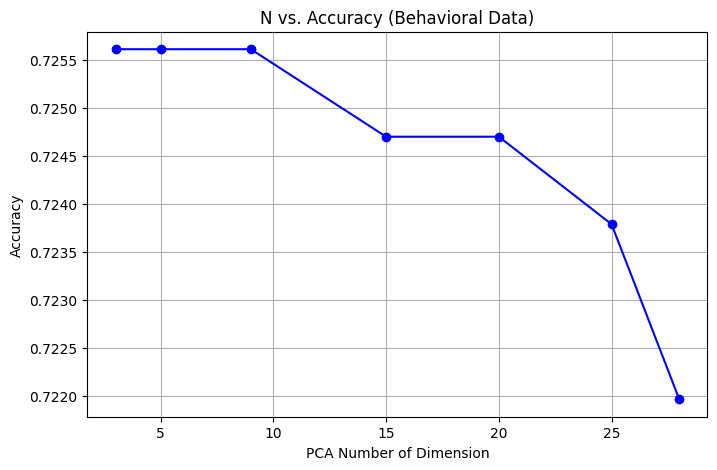

In [52]:
plt.figure(figsize=(8, 5))
plt.plot(pca_n_list, accuracy_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('PCA Number of Dimension')
plt.ylabel('Accuracy')
plt.title('N vs. Accuracy (Behavioral Data)')
plt.grid(True)
plt.show()

Health variable

In [53]:
# datatotal_new = pd.read_csv("datatotal_new.csv")

# Health

# binary classification
X = df_health
y = datatotal_new[['If_Depression_1']]

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# # hyperparameter tuning
# param_grid = {'C': np.logspace(-3, 2, 6),  # from .001 to 100
#              'gamma': np.logspace(-3, 2, 6)}
# svc_radial = SVC(kernel='rbf')
# grid_search = GridSearchCV(svc_radial, param_grid, cv=5,scoring='accuracy') # 1-misclassification rate
# grid_search.fit(X_train, y_train)
# print('Best parameters: {}'.format(grid_search.best_params_))

# preprocessing
# # standard scaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# dimension reduction
pca_n_list = [3, 5, 9, 15, 20, 25, 30]
accuracy_scores = []
for i in pca_n_list:
       pca = PCA(n_components=i, random_state=42)
       pca_X_train = pca.fit_transform(X_train) #X_train_scaled
       pca_X_test = pca.fit_transform(X_test) #X_test_scaled
       print(f"{i} components:")

    #    # hyperparameter tuning
    #    param_grid = {'C': np.logspace(-3, 2, 6),  # from .001 to 100
    #                 'gamma': np.logspace(-3, 2, 6)}
    #    svc_radial = SVC(kernel='rbf')
    #    grid_search = GridSearchCV(svc_radial, param_grid, cv=5,scoring='accuracy') # 1-misclassification rate
    #    grid_search.fit(X_train, y_train)
    #    print('Best parameters: {}'.format(grid_search.best_params_))

       # svm 
       svm = SVC(C = 50, kernel='rbf', degree=3, gamma=0.007)
       svm.fit(pca_X_train, y_train)
       print("SVM cross val score",cross_val_score(svm, pca_X_train, y_train, cv=5).mean())

       y_pred = svm.predict(pca_X_train)
       accuracy_train = accuracy_score(y_train, y_pred)
       print("Classification accuracy for training data is:", accuracy_train)

       # Generating confusion matrix
       conf_matrix = confusion_matrix(y_train, y_pred)
       print('the confusion matrix is: \n', conf_matrix)

       # Output classification reports
       print("Classification report for training data:")
       print(classification_report(y_train, y_pred))

       y_pred = svm.predict(pca_X_test)
       accuracy_test = accuracy_score(y_test, y_pred)
       print("Classification accuracy for testing data is:", accuracy_test)
       accuracy_scores.append(accuracy_test)

       # Generating confusion matrix
       conf_matrix = confusion_matrix(y_test, y_pred)
       print('the confusion matrix is: \n', conf_matrix)

       # Output classification reports
       print("Classification report for training data:")
       print(classification_report(y_test, y_pred))

print(accuracy_scores)

3 components:
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array

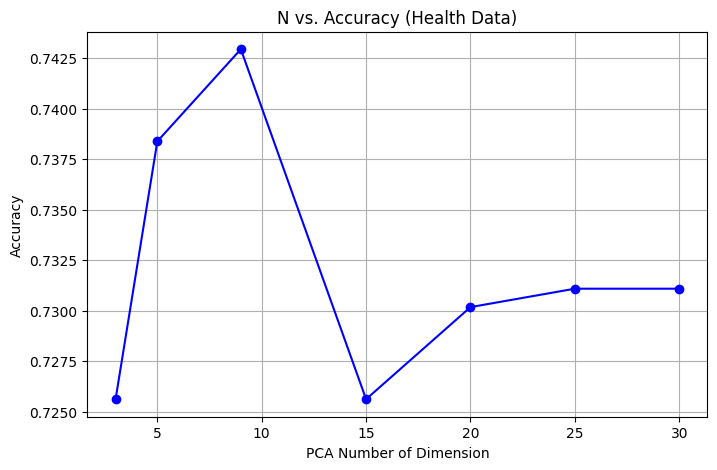

In [54]:
plt.figure(figsize=(8, 5))
plt.plot(pca_n_list, accuracy_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('PCA Number of Dimension')
plt.ylabel('Accuracy')
plt.title('N vs. Accuracy (Health Data)')
plt.grid(True)
plt.show()

Combined variables

In [55]:
# combined variables
# datatotal_new = pd.read_csv("datatotal_new.csv")

# binary classification
X = datatotal_new.drop(columns=['If_Depression_1'])
y = datatotal_new[['If_Depression_1']]

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# # hyperparameter tuning
# param_grid = {'C': np.logspace(-3, 2, 6),  # from .001 to 100
#              'gamma': np.logspace(-3, 2, 6)}
# svc_radial = SVC(kernel='rbf')
# grid_search = GridSearchCV(svc_radial, param_grid, cv=5,scoring='accuracy') # 1-misclassification rate
# grid_search.fit(X_train, y_train)
# print('Best parameters: {}'.format(grid_search.best_params_))

# preprocessing
# # standard scaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# dimension reduction
pca_n_list = [3, 5, 9, 15, 20, 25, 30, 35, 38, 40, 42]
accuracy_scores = []
for i in pca_n_list:
       pca = PCA(n_components=i, random_state=42)
       pca_X_train = pca.fit_transform(X_train) #X_train_scaled
       pca_X_test = pca.fit_transform(X_test) #X_test_scaled
       print(f"{i} components:")

    #    # hyperparameter tuning
    #    param_grid = {'C': np.logspace(-3, 2, 6),  # from .001 to 100
    #                 'gamma': np.logspace(-3, 2, 6)}
    #    svc_radial = SVC(kernel='rbf')
    #    grid_search = GridSearchCV(svc_radial, param_grid, cv=5,scoring='accuracy') # 1-misclassification rate
    #    grid_search.fit(X_train, y_train)
    #    print('Best parameters: {}'.format(grid_search.best_params_))

       # svm 
       svm = SVC(C = 50, kernel='rbf', degree=3, gamma=0.007)
       svm.fit(pca_X_train, y_train)
       print("SVM cross val score",cross_val_score(svm, pca_X_train, y_train, cv=5).mean())

       y_pred = svm.predict(pca_X_train)
       accuracy_train = accuracy_score(y_train, y_pred)
       print("Classification accuracy for training data is:", accuracy_train)

       # Generating confusion matrix
       conf_matrix = confusion_matrix(y_train, y_pred)
       print('the confusion matrix is: \n', conf_matrix)

       # Output classification reports
       print("Classification report for training data:")
       print(classification_report(y_train, y_pred))

       y_pred = svm.predict(pca_X_test)
       accuracy_test = accuracy_score(y_test, y_pred)
       print("Classification accuracy for testing data is:", accuracy_test)
       accuracy_scores.append(accuracy_test)

       # Generating confusion matrix
       conf_matrix = confusion_matrix(y_test, y_pred)
       print('the confusion matrix is: \n', conf_matrix)

       # Output classification reports
       print("Classification report for training data:")
       print(classification_report(y_test, y_pred))

print(accuracy_scores)

3 components:
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array

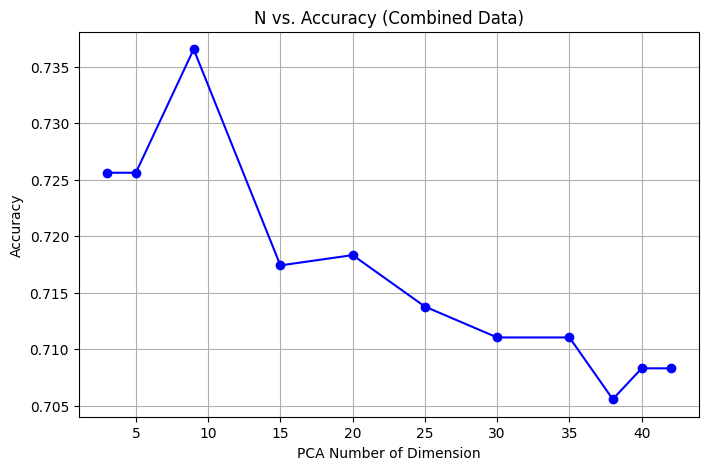

In [56]:
plt.figure(figsize=(8, 5))
plt.plot(pca_n_list, accuracy_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('PCA Number of Dimension')
plt.ylabel('Accuracy')
plt.title('N vs. Accuracy (Combined Data)')
plt.grid(True)
plt.show()

### ROC Curves for Selected Models

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


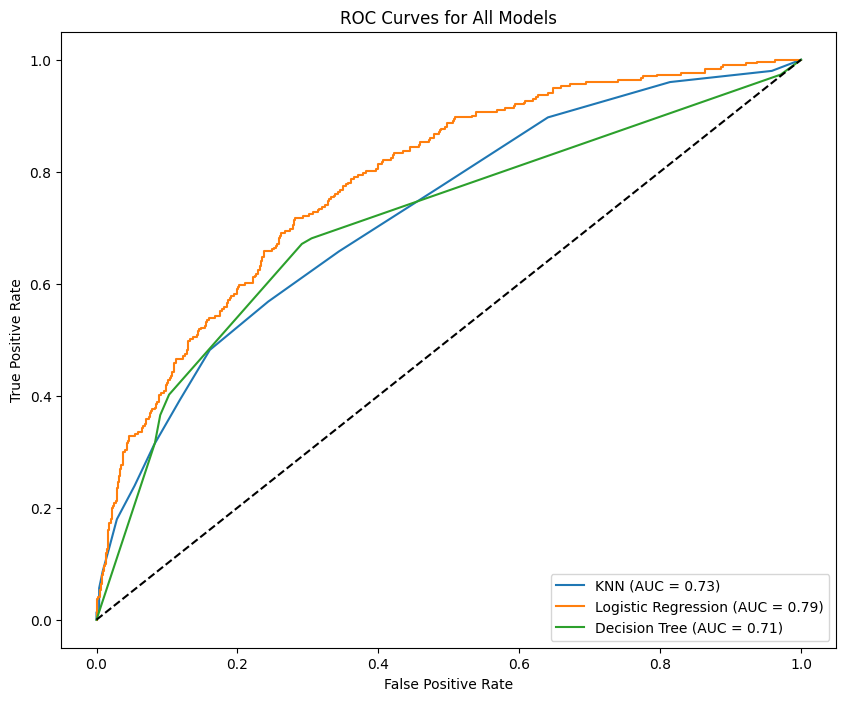

In [57]:
datatotal_new = pd.read_csv("datatotal_new.csv")

# binary classification
X = datatotal_new.drop(columns=['If_Depression_1'])
y = datatotal_new[['If_Depression_1']]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# SVM
# dimension reduction - PCA transformation
pca = PCA(n_components=9, random_state=42)
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.fit_transform(X_test)

# initialize the models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=22),
    # "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(penalty='l1', solver='liblinear'),
    # "SVM": SVC(C = 50, kernel='rbf', degree=3, gamma=0.007),
    "Decision Tree" : DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=0)
}

# train the models
for name, model in models.items():
    if name == 'SVM':
        model.fit(pca_X_train, y_train)
    else: 
        model.fit(X_train, y_train)

plt.figure(figsize=(10, 8))

# calculate ROC Curve and AUC for each model
for name, model in models.items():
    if name == 'SVM':  # For SVM or any model that doesn't have .predict_proba by default
        y_scores = model.decision_function(pca_X_test)
    else:
        y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.show()
 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9ef9efd2-4aa2-4844-aac7-a56ead4174d3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>